In [1]:
import collections
import logging
import os
import pathlib
import re
import sys
import time
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import scipy.stats as st
from scipy import stats
import math
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K

from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
tf.compat.v1.enable_eager_execution(
    config=None, device_policy=None, execution_mode=None
)
import Transformer_informer
import TNN_functions
import TNN_preprocess_informer
import TNN_train_informer
import TNN_test
import scipy as sp
import glob
import os

from SALib.sample import saltelli
from SALib.analyze import sobol


In [2]:
## WRITE a function that reads each of the k-fold CV model weights (and each of the new GSA samples), 
# returns the output, and average the k outputs

In [3]:
path_to_the_directory = 'D:/TNN/'

path = path_to_the_directory + r'inputs/inputs-estuary/past/' 
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []
num_features_per_variable = np.zeros(shape=(1,85))
idx = 0

num_posterior = 2#len(all_files)
print(num_posterior)

for filename in all_files:
    print(filename)
    df = pd.read_csv(filename)
#     print(df)
    df=df.set_index('Date')
    df.index = pd.to_datetime(df.index).date
#     num_features_per_variable[:,idx] = len(df.columns)
#     num_features_per_variable[:,idx+4] = len(df.columns)
#     num_features_per_variable[:,idx+4*2] = len(df.columns)
#     num_features_per_variable[:,idx+4*3] = len(df.columns)
#     num_features_per_variable[:,idx+4*4] = len(df.columns)

    idx += 1
#     print(df)
    li.append(df)
#     print(li)
df = pd.concat(li, axis=1, ignore_index=False)
column_feature = df.columns
input_num_features = len(column_feature)
df.reset_index(inplace=True)
df.rename(columns={ df.columns[0]: "Date" }, inplace = True)
df = df.iloc[:,1:]

print(df)
print(num_features_per_variable)

2
D:/Datasets/Transformer Datasets/Article/LA_MS/inputs/past\01-salinity_Rigolets.csv
D:/Datasets/Transformer Datasets/Article/LA_MS/inputs/past\02-C.csv
D:/Datasets/Transformer Datasets/Article/LA_MS/inputs/past\03-hydro.csv
D:/Datasets/Transformer Datasets/Article/LA_MS/inputs/past\04-spillway.csv
      Salinity R  Tmean_R  condmax_BB  condmin_BB  condmean_BB  condmax_RIL  \
0            3.2      7.3       24400     15834.0      20352.0      28500.0   
1            3.5      6.5       27900     15300.0      22400.0      23200.0   
2            3.9      5.3       29800     15300.0      23400.0      29800.0   
3            4.0      4.7       31800     18000.0      26700.0      30800.0   
4            3.8      4.7       34900     21600.0      30300.0      42600.0   
...          ...      ...         ...         ...          ...          ...   
4007         3.5     10.7       33300     17300.0      24200.0      38451.0   
4008         4.2     11.3       30700     18800.0      24700.0     

In [4]:
import pandas as pd
import glob
import os

path = path_to_the_directory + r'inputs/inputs-estuary/forecast/' 
all_files = glob.glob(os.path.join(path , "*.csv"))
idx=4*5
li = []

for filename in all_files:
    print(filename)
    dataset_rain = pd.read_csv(filename)
#     print(df)
    dataset_rain=dataset_rain.set_index('Date')
    dataset_rain.index = pd.to_datetime(dataset_rain.index).date
#     num_features_per_variable[:,idx] = len(dataset_rain.columns)
#     num_features_per_variable[:,idx+5] = len(dataset_rain.columns)
#     num_features_per_variable[:,idx+5*2] = len(dataset_rain.columns)
#     num_features_per_variable[:,idx+5*3] = len(dataset_rain.columns)
#     num_features_per_variable[:,idx+5*4] = len(dataset_rain.columns)
#     num_features_per_variable[:,idx+5*5] = len(dataset_rain.columns)
#     num_features_per_variable[:,idx+5*6] = len(dataset_rain.columns)
#     num_features_per_variable[:,idx+5*7] = len(dataset_rain.columns)
#     num_features_per_variable[:,idx+5*8] = len(dataset_rain.columns)
#     num_features_per_variable[:,idx+5*9] = len(dataset_rain.columns)
#     num_features_per_variable[:,idx+5*10] = len(dataset_rain.columns)
#     num_features_per_variable[:,idx+5*11] = len(dataset_rain.columns)

    idx += 1
    column_feature = dataset_rain.columns
#     print(column_feature)
    li.append(dataset_rain)
#     print(li)
dataset_rain = pd.concat(li, axis=1, ignore_index=False)
dataset_rain.reset_index(inplace=True) # moves the index to the first column (needed when defining the T2V columns)
dataset_rain.rename(columns={ dataset_rain.columns[0]: "Date" }, inplace = True)
print(dataset_rain)
print(num_features_per_variable)
num_forecast = len(all_files)
print(num_forecast)

num_variables = num_posterior + num_forecast
print(num_variables)

D:/Datasets/Transformer Datasets/Article/LA_MS/inputs/forecast\05-r.csv
D:/Datasets/Transformer Datasets/Article/LA_MS/inputs/forecast\06-uwind.csv
D:/Datasets/Transformer Datasets/Article/LA_MS/inputs/forecast\07-vwind.csv
D:/Datasets/Transformer Datasets/Article/LA_MS/inputs/forecast\08-pres.csv
D:/Datasets/Transformer Datasets/Article/LA_MS/inputs/forecast\10-T.csv
            Date       p1       p2       p3      p4      p5      p6      p7  \
0     2010-01-07   9.0826   7.4810   6.7492  7.4406  7.1069  6.6768  6.7995   
1     2010-01-08   0.0000   0.0000   0.0000  0.0000  0.1066  0.1902  0.2252   
2     2010-01-09   0.0000   0.0000   0.0000  0.0000  0.0000  0.0000  0.0000   
3     2010-01-10   0.0000   0.0000   0.0000  0.0000  0.0000  0.0000  0.0000   
4     2010-01-11   0.0000   0.0000   0.0000  0.0000  0.0000  0.0000  0.0000   
...          ...      ...      ...      ...     ...     ...     ...     ...   
4007  2020-12-27   0.0000   0.0000   0.0000  0.0000  0.0000  0.0000  0.0000 

In [6]:
# =============================================================================================================================#

# Column from dataset to fit and evaluate and variable and station name to save output dataset
col_pred = 1
col_pred_targets = 1

variable = 'Salinity'
units = '$ppt$'
conversion_factor = 1# 0.0283168
area = 'Northern Gulf'
station = 'Rigolets'
date = '28-12-2018'


MC_iterations = 1

# Lag of time series
steps=14 # Future time steps

# Hyperparameters
t_lag = 14 # Past historic of input X
t_lag2 = 1
num_layers = 1
num_heads = 64
dff = 256
dropout_rate=0.05
batch_size = 64
emb_dim_enc = 1024
emb_dim_dec = emb_dim_enc
EPOCHS = 50
dev_ratio = 0.1 # Ratio to split validation subset 




if dev_ratio == 0.05:
    iterations = 20
elif dev_ratio == 0.1:
    iterations = 10
elif dev_ratio == 0.2:
    iterations = 5

std_val = np.zeros(shape=(steps, iterations))

# Reserve last n_test days for testing
n_test = 366 + 365

# # =============================================================================================================================#

# # Read main csv file
# dataset = read_csv(csv_path)

# df = dataset.copy().iloc[:,1:]

# Read Forcings csv files
# dataset_rain = read_csv(csv_path_rain)
# df_rain = dataset_rain.copy().iloc[:,1:]

datadate = dataset_rain['Date'] =  pd.to_datetime(dataset_rain['Date'], format='%Y/%m/%d')
dataset_rain['num'] = np.array(range(len(dataset_rain)))
dataset_rain['day'] = datadate.dt.day
dataset_rain['month'] = datadate.dt.month
dataset_rain['year'] = datadate.dt.year

dataset_rain = TNN_functions.timestamp(dataset_rain, 'month', 12)
dataset_rain= TNN_functions.timestamp(dataset_rain, 'day', 30.4375)
df_rain = dataset_rain.copy().iloc[:,1:]
T2V = df_rain.copy().iloc[:,-8:]
print('df', df.shape)
print('df_rain:', df_rain.shape)


df (4012, 69)
df_rain: (4012, 538)


In [7]:
csv_path_targets = path_to_the_directory + 'inputs/targets-estuary.csv'
path_to_outputs = path_to_the_directory + 'outputs/'
# Read Targets csv file
dataset_targets = read_csv(csv_path_targets)
df_targets = dataset_targets.copy().iloc[:,1:]

In [8]:
for itera in range(0,iterations):  
    
    # data preprocessing
    train_dataset, dev_dataset, train_X, train_y, test_X, test_y_targets, train_y_mean, train_y_std, dev_X, dev_y, X, train_X_mean, train_X_std = TNN_preprocess_informer.preprocess(df, df_rain, df_targets, steps, col_pred, col_pred_targets, t_lag, t_lag2, n_test, batch_size, dev_ratio, itera)
    X.to_csv(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/inputs.csv' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads))
#     print('test_y_targets', test_y_targets)
    # create transformer object
    transformer = Transformer_informer.Transformer(
                num_layers=num_layers,
                d_model=emb_dim_enc,
                d_model_out=emb_dim_dec,
                num_heads=num_heads,
                dff=dff,
                input_vocab_size = train_X.shape[1],
                target_vocab_size=train_y.shape[1],
#                     features=X_out.shape[-1],
                rate=dropout_rate,
                steps=steps
    )
    print('test_X:', test_X.shape)

    # training and validation
    TNN_train_informer.train_val(transformer, 
                                 num_layers, 
                                 emb_dim_enc, 
                                 emb_dim_dec, 
                                 num_heads, 
                                 dff, 
                                 train_X, 
                                 train_y, 
                                 dropout_rate, 
                                 EPOCHS, 
                                 train_dataset, 
                                 dev_dataset,
                                 steps)
    # Validation
#     y_hat_val, y_hat_inv_scaled_val, y_val_inv_scaled = TNN_test.test_informer(transformer,
#                                                                           dev_y, 
#                                                                           MC_iterations, 
#                                                                           int((len(df) - n_test)*dev_ratio), 
#                                                                           dev_X, 
#                                                                           train_y_mean, 
#                                                                           train_y_std, 
#                                                                           steps)
    tinp = dev_y[:,:,:].copy()
#     tinp = tar_inp_val.numpy()
    tinp[:,-steps:, :1] = 0
    tar_inp_val = tf.convert_to_tensor(tinp)   
    val_X = tf.convert_to_tensor(dev_X)
    y_val = dev_y[:,-steps:,:1].copy()
#     tar_real_val = dev_y[:,-steps:, :1]

    val_output, _= transformer((val_X, tar_inp_val), False, False, True, False, steps)
    
    df_train_mean_y=((train_y_mean))
    df_train_std_y=((train_y_std))
    
    y_hat = K.eval(val_output) # to transform from tensor to numpy array
#     print(y_hat)
#     y_hat = np.asarray(y_hat)
    y_hat = (y_hat.reshape(y_hat.shape[0], y_hat.shape[1]))

#     y_val = dev_y[:,-steps:,:1].copy()
    y_val = (y_val.reshape(y_val.shape[0], y_val.shape[1]))
    y_hat_val = pd.DataFrame(y_hat * df_train_std_y[0] + df_train_mean_y[0])
    y_val_inv_scaled = pd.DataFrame(y_val * df_train_std_y[0] + df_train_mean_y[0])
    print('y_hat_val:', y_hat_val)
    print('y_val_inv_scaled:', y_val_inv_scaled)
#     print('dev_y', dev_y)
    
    std_val[:,itera] = st.stats.tstd(y_hat_val*conversion_factor - y_val_inv_scaled*conversion_factor)
    print(std_val)

    # testing
    dist_ts, y_hat_inv_scaled, y_test_inv_scaled = TNN_test.test_informer(transformer,
                                                                          test_y_targets, 
                                                                          MC_iterations, 
                                                                          n_test, 
                                                                          test_X, 
                                                                          train_y_mean, 
                                                                          train_y_std, 
                                                                          steps)
    
    print('y_test:',dist_ts)


    # saving results
    y_hat_val.to_csv(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/95PPU_val_%i.csv' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads, itera))

    y_val_inv_scaled.to_csv(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/y_val.csv' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads))

    
    
    dist_ts.to_csv(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/95PPU_test_%i.csv' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads, itera))

    y_test_inv_scaled.to_csv(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/y_test.csv' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads))

    ckpt = tf.train.Checkpoint(transformer=transformer)
    save_path = ckpt.save(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/weights/ckpt_(%i)' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads,itera))
    print(f'Saving checkpoint for iteration {itera+1} at {save_path}')

X: Index(['Salinity R', 'Tmean_R', 'condmax_BB', 'condmin_BB', 'condmean_BB',
       'condmax_RIL', 'condmin_RIL', 'condmax_EPRC', 'condmin_EPRC',
       'condmax_R', 'condmin_R', 'salmax_R', 'salmin_R', 'salmean_R',
       'condmax_GP', 'condmin_GP', 'condmean_GP', 'condmax_4C', 'condmin_4C',
       'condmean_4C', 'condmax_NBG', 'condmin_NBG', 'condmax_BBSI',
       'condmin_BBSI', 'condmean_BBSI', 'condmax_BBB', 'condmin_BBB',
       'condmean_BBB', 'condmax_WPR', 'condmin_WPR', 'condmax_PascR',
       'condmax_PascR.1', 'condmean_PascR', 'GH Baton Rouge (mean)',
       'Gh_MR(ft)', 'Q_MR(ft3s-1)', 'Ghmax_MRBR(ft)', 'Ghmin_MRBR(ft)',
       'Qmean_MRBR(ft3s-1)',
       'Q USGS 07289000 MISSISSIPPI RIVER AT VICKSBURG, MS',
       'GH_MSR_Belle(ft)', 'Disch_MSR_Belle(ft3 s-1)', 'Ghmean_JIL(ft)',
       'Ghmax_R(ft)', 'GHmin_R(ft)', 'Ghmean_R(ft)', 'GHmax_GP(ft)',
       'Ghmin_FP(ft)', 'Ghmean_GP(ft)', 'Qmean_TR(ft3s-1)', 'Ghmax_BFR(ft)',
       'Ghmin_BFR(ft)', 'Ghmean_BFR(ft)', 'Ghme

C:\Users\eorozcolopez\AppData\Local\Temp\ipykernel_40384\2171601956.py:71: DeprecationWarning: Please use `tstd` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  std_val[:,itera] = st.stats.tstd(y_hat_val*conversion_factor - y_val_inv_scaled*conversion_factor)


y_test:            0         1         2         3         4         5         6   \
0    3.347546  3.085043  4.194132  5.871882  7.183840  4.610165  2.678102   
1    3.595527  3.676407  4.153106  3.723449  3.840996  3.527645  2.790524   
2    3.809102  3.836092  3.470253  2.925638  3.216874  3.412472  2.955564   
3    3.473784  2.913113  2.524174  2.332116  2.757577  3.584120  2.664616   
4    3.101007  2.962981  2.747446  2.624862  3.102564  3.142583  2.141096   
..        ...       ...       ...       ...       ...       ...       ...   
726  3.317852  3.473682  3.642730  3.950136  3.682640  3.160840  2.490803   
727  3.027306  3.257709  4.091506  4.052569  3.255649  2.821600  2.346486   
728  3.379179  3.725882  3.966936  3.273891  2.679477  2.415012  2.037897   
729  3.661673  3.686745  3.315283  2.625246  2.412907  2.207224  2.229003   
730  3.262929  3.059229  2.567540  2.399590  2.309342  1.816835  1.865258   

           7         8         9         10        11        12    

C:\Users\eorozcolopez\AppData\Local\Temp\ipykernel_40384\2171601956.py:71: DeprecationWarning: Please use `tstd` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  std_val[:,itera] = st.stats.tstd(y_hat_val*conversion_factor - y_val_inv_scaled*conversion_factor)


y_test:            0         1         2         3         4         5         6   \
0    3.827091  3.988231  4.811638  8.648582  7.729286  3.669430  2.883639   
1    4.105315  4.979797  7.139999  5.849256  3.560857  2.999921  2.997443   
2    5.637459  6.621801  4.344754  3.439010  3.065567  3.267813  3.766982   
3    7.105184  4.644779  3.142214  2.977643  3.232347  4.152843  4.383905   
4    3.865058  2.879531  2.639768  2.739983  3.837791  4.481915  3.625759   
..        ...       ...       ...       ...       ...       ...       ...   
726  3.764840  3.381773  3.640991  4.874404  3.670454  2.973423  2.722635   
727  3.282822  3.540802  4.551676  3.823065  3.101682  2.724894  2.438741   
728  3.647652  4.364933  3.951760  3.230296  2.753003  2.365438  2.174236   
729  3.715525  3.614617  3.205055  2.851087  2.420618  2.202835  2.048431   
730  3.708570  2.776146  2.602186  2.368335  2.204478  2.070127  2.028857   

           7         8         9         10        11        12    

C:\Users\eorozcolopez\AppData\Local\Temp\ipykernel_40384\2171601956.py:71: DeprecationWarning: Please use `tstd` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  std_val[:,itera] = st.stats.tstd(y_hat_val*conversion_factor - y_val_inv_scaled*conversion_factor)


y_test:            0         1         2         3         4         5         6   \
0    3.574945  3.991391  5.326663  6.633531  6.597807  5.032503  3.494161   
1    3.658971  4.507722  5.722294  4.985920  3.817944  3.197245  3.342560   
2    4.634710  4.388922  4.326502  3.536480  2.911683  2.884407  3.514842   
3    4.333211  3.628710  3.341555  3.172754  3.206423  3.588465  3.797867   
4    3.213166  2.857853  2.690117  2.910347  3.117982  3.290170  3.062212   
..        ...       ...       ...       ...       ...       ...       ...   
726  2.960417  3.202536  3.106926  3.335047  3.398105  3.387996  2.867889   
727  3.378708  3.406152  3.577263  3.454585  2.997851  2.794173  2.366054   
728  3.494266  3.533858  3.666476  3.466891  3.067077  2.929448  2.693696   
729  3.763489  3.819483  3.680223  3.336606  3.071454  2.924934  2.784310   
730  3.772570  3.748539  3.453363  3.204434  2.916818  2.721109  2.677664   

           7         8         9         10        11        12    

C:\Users\eorozcolopez\AppData\Local\Temp\ipykernel_40384\2171601956.py:71: DeprecationWarning: Please use `tstd` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  std_val[:,itera] = st.stats.tstd(y_hat_val*conversion_factor - y_val_inv_scaled*conversion_factor)


y_test:            0         1         2         3         4         5         6   \
0    4.056889  4.231528  5.181578  5.404384  5.349105  4.983966  3.679714   
1    4.802333  5.570005  5.242278  4.786973  4.405461  4.389308  4.011388   
2    5.377828  4.500229  3.969265  4.017123  4.220354  4.376982  4.428678   
3    5.448135  4.267939  3.579505  3.626172  4.403339  5.165231  4.953674   
4    3.735673  3.243351  3.297918  3.792499  4.891710  5.528887  4.498901   
..        ...       ...       ...       ...       ...       ...       ...   
726  2.842500  2.836067  3.087686  3.929286  3.570768  2.818357  2.894348   
727  3.109449  2.876004  3.185223  3.533340  2.604851  2.121845  2.409684   
728  3.664728  3.775522  3.057732  2.749089  2.378000  1.972351  2.009096   
729  4.342225  4.205522  3.012390  2.437916  1.901714  1.708717  1.975506   
730  3.777319  3.098842  2.535111  2.258678  1.818369  1.620579  1.892713   

           7         8         9         10        11        12    

C:\Users\eorozcolopez\AppData\Local\Temp\ipykernel_40384\2171601956.py:71: DeprecationWarning: Please use `tstd` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  std_val[:,itera] = st.stats.tstd(y_hat_val*conversion_factor - y_val_inv_scaled*conversion_factor)


y_test:            0         1         2         3         4         5         6   \
0    4.547606  4.137300  3.964020  4.926543  4.863111  3.389374  2.795694   
1    4.387039  4.012787  3.834560  3.794312  3.182215  2.798070  2.970385   
2    5.438722  4.393931  3.511635  3.023256  3.003942  2.929943  3.471415   
3    5.675530  3.817917  3.101234  2.982023  3.238307  3.601146  3.760143   
4    4.572484  3.429225  2.924869  2.985159  3.725392  3.908927  3.399081   
..        ...       ...       ...       ...       ...       ...       ...   
726  2.475023  3.114518  2.744844  2.636165  2.608236  2.009802  2.004671   
727  3.074492  3.147138  3.016303  3.005841  2.305176  2.059669  2.129829   
728  3.048909  3.235017  3.067387  2.526591  1.962928  1.954096  1.930881   
729  2.860425  2.878222  2.585543  2.286064  1.999339  1.845955  1.854118   
730  3.358895  2.912485  2.612588  2.197614  1.898080  1.675460  1.770387   

           7         8         9         10        11        12    

C:\Users\eorozcolopez\AppData\Local\Temp\ipykernel_40384\2171601956.py:71: DeprecationWarning: Please use `tstd` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  std_val[:,itera] = st.stats.tstd(y_hat_val*conversion_factor - y_val_inv_scaled*conversion_factor)


y_test:            0         1         2         3         4         5         6   \
0    4.020137  3.954875  4.220129  4.530810  4.422467  4.058856  3.222525   
1    3.972076  4.362746  4.773250  4.226079  3.298402  2.950376  3.065083   
2    4.482592  4.300993  3.740916  2.861714  2.522829  2.685723  3.337213   
3    3.962714  3.289869  2.892065  2.549346  2.557126  2.945471  3.098830   
4    3.474719  3.034925  2.943980  2.937931  3.283794  3.755835  3.067936   
..        ...       ...       ...       ...       ...       ...       ...   
726  2.114095  2.433079  2.584386  2.861600  3.143486  3.062025  2.422795   
727  2.283385  2.240502  2.608621  2.758497  2.602131  2.262667  2.014331   
728  2.263855  2.184617  2.522308  2.364157  1.936547  1.742518  1.838237   
729  2.688155  2.663916  2.755667  2.446675  2.007354  1.816435  1.966896   
730  2.687149  2.356955  2.439846  2.248145  1.910654  1.708159  1.917136   

           7         8         9         10        11        12    

C:\Users\eorozcolopez\AppData\Local\Temp\ipykernel_40384\2171601956.py:71: DeprecationWarning: Please use `tstd` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  std_val[:,itera] = st.stats.tstd(y_hat_val*conversion_factor - y_val_inv_scaled*conversion_factor)


y_test:            0         1         2         3         4         5         6   \
0    4.107645  3.543812  4.209946  5.382905  5.632014  4.807509  3.559560   
1    4.081677  3.965326  3.977215  3.946574  3.717506  3.612082  3.853191   
2    5.601416  4.715654  3.698957  3.209178  3.200205  4.016678  5.081326   
3    5.378009  4.200578  3.172354  2.853849  2.939573  4.439497  4.786335   
4    4.069798  3.893469  3.307037  3.160340  3.710211  5.028893  4.206447   
..        ...       ...       ...       ...       ...       ...       ...   
726  2.740803  3.292388  3.287807  3.620899  4.027421  3.397953  2.979182   
727  2.826313  2.919881  3.144206  3.819446  3.968379  3.197706  2.657582   
728  2.935486  3.053229  3.257331  3.700255  3.330496  2.657191  2.203238   
729  3.140032  3.322396  3.580128  3.419775  2.888512  2.419645  2.175717   
730  3.605525  3.635977  3.432874  2.973356  2.693718  2.446180  2.480620   

           7         8         9         10        11        12    

C:\Users\eorozcolopez\AppData\Local\Temp\ipykernel_40384\2171601956.py:71: DeprecationWarning: Please use `tstd` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  std_val[:,itera] = st.stats.tstd(y_hat_val*conversion_factor - y_val_inv_scaled*conversion_factor)


y_test:            0         1         2         3         4         5         6   \
0    4.766194  4.432614  4.475463  5.014770  5.134366  4.434026  3.139661   
1    4.457764  4.759411  4.831870  4.530550  4.008467  3.502233  3.015628   
2    5.287567  5.156948  4.598190  4.071457  3.896369  3.826925  3.412944   
3    4.801940  3.926468  3.212030  3.288751  3.557719  3.767331  3.398548   
4    4.067566  3.413889  3.145697  3.586887  4.305683  4.051487  2.987394   
..        ...       ...       ...       ...       ...       ...       ...   
726  3.030788  3.321208  3.412046  3.661938  3.592110  3.036941  2.403253   
727  2.951926  2.819804  3.340057  3.954168  3.641206  2.797068  2.245832   
728  3.007874  3.140271  3.649140  3.815662  3.238030  2.602194  2.307895   
729  3.252016  3.259552  3.493775  3.292051  2.745963  2.458593  2.312002   
730  3.719050  3.221282  2.921171  2.612909  2.417137  2.371974  2.353182   

           7         8         9         10        11        12    

C:\Users\eorozcolopez\AppData\Local\Temp\ipykernel_40384\2171601956.py:71: DeprecationWarning: Please use `tstd` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  std_val[:,itera] = st.stats.tstd(y_hat_val*conversion_factor - y_val_inv_scaled*conversion_factor)


y_test:            0         1         2         3         4         5         6   \
0    3.428212  3.438500  3.856976  4.861378  5.490464  4.391574  3.296413   
1    3.035147  3.374066  3.689368  3.637840  3.468507  3.397054  3.191529   
2    4.037304  3.838096  3.400323  3.000233  3.020807  3.305178  3.543919   
3    4.846474  3.710201  2.948574  2.883557  3.111056  3.806275  3.822671   
4    3.501086  2.893384  2.805149  3.074428  3.365829  3.787740  3.043562   
..        ...       ...       ...       ...       ...       ...       ...   
726  3.180494  3.171882  3.278863  3.731878  3.912051  3.320939  2.569724   
727  3.093476  3.091059  3.602930  4.118582  3.563121  2.625697  2.094372   
728  3.377004  3.665866  3.882349  3.580918  2.879615  2.327822  1.982909   
729  4.005546  4.159959  3.641984  2.913270  2.525537  2.118267  1.888998   
730  3.635568  3.476488  2.740638  2.409066  2.093922  1.884589  2.019994   

           7         8         9         10        11        12    

C:\Users\eorozcolopez\AppData\Local\Temp\ipykernel_40384\2171601956.py:71: DeprecationWarning: Please use `tstd` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  std_val[:,itera] = st.stats.tstd(y_hat_val*conversion_factor - y_val_inv_scaled*conversion_factor)


y_test:            0         1         2         3         4         5         6   \
0    3.693761  4.053316  5.162443  5.945558  5.638426  4.722270  3.551015   
1    4.090069  5.231375  5.871942  4.493019  3.677085  3.825768  3.956370   
2    4.548386  5.189416  4.479696  3.426880  3.373017  4.039468  4.656193   
3    4.363161  3.827090  3.226127  3.008011  3.293680  4.007240  4.715940   
4    3.438456  3.080924  2.958610  3.122982  3.645302  4.535332  4.415181   
..        ...       ...       ...       ...       ...       ...       ...   
726  2.650913  3.198945  3.178455  3.266942  3.162587  2.886540  2.908922   
727  2.820951  3.071204  3.432511  3.454775  2.898083  2.710755  2.649758   
728  2.913187  3.167883  3.471558  3.068783  2.631443  2.434400  2.395438   
729  3.082502  3.156949  3.026873  2.699347  2.388233  2.284229  2.192106   
730  2.944579  2.720085  2.603725  2.420752  2.249848  2.223173  2.261562   

           7         8         9         10        11        12    

In [9]:
std_val_df =pd.DataFrame(std_val)
std_val_df.to_csv(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/std_val.csv' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads))

data <class 'pandas.core.frame.DataFrame'>
pred_in: 678
pred_out: 53
coverage: 0.9274965800273598
data <class 'pandas.core.frame.DataFrame'>
pred_in: 672
pred_out: 59
coverage: 0.9192886456908345
data <class 'pandas.core.frame.DataFrame'>
pred_in: 674
pred_out: 57
coverage: 0.9220246238030095
data <class 'pandas.core.frame.DataFrame'>
pred_in: 664
pred_out: 67
coverage: 0.908344733242134
data <class 'pandas.core.frame.DataFrame'>
pred_in: 659
pred_out: 72
coverage: 0.9015047879616963
data <class 'pandas.core.frame.DataFrame'>
pred_in: 652
pred_out: 79
coverage: 0.8919288645690835
data <class 'pandas.core.frame.DataFrame'>
pred_in: 639
pred_out: 92
coverage: 0.8741450068399452
data <class 'pandas.core.frame.DataFrame'>
pred_in: 641
pred_out: 90
coverage: 0.8768809849521204
data <class 'pandas.core.frame.DataFrame'>
pred_in: 650
pred_out: 81
coverage: 0.8891928864569083
data <class 'pandas.core.frame.DataFrame'>
pred_in: 643
pred_out: 88
coverage: 0.8796169630642955
data <class 'pandas.c

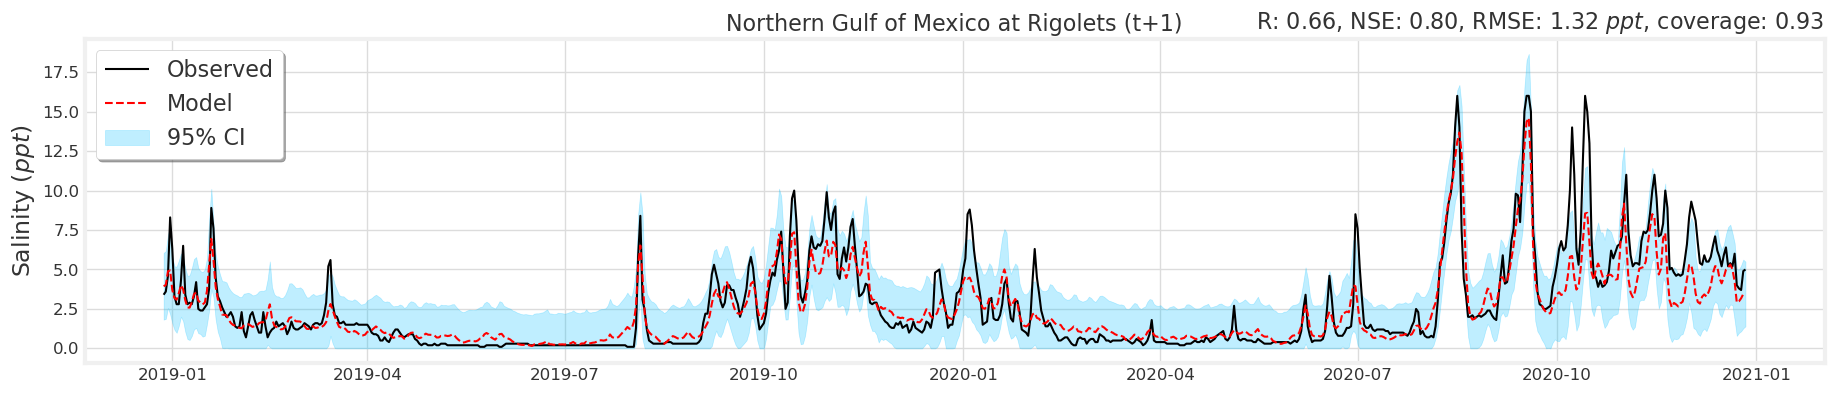

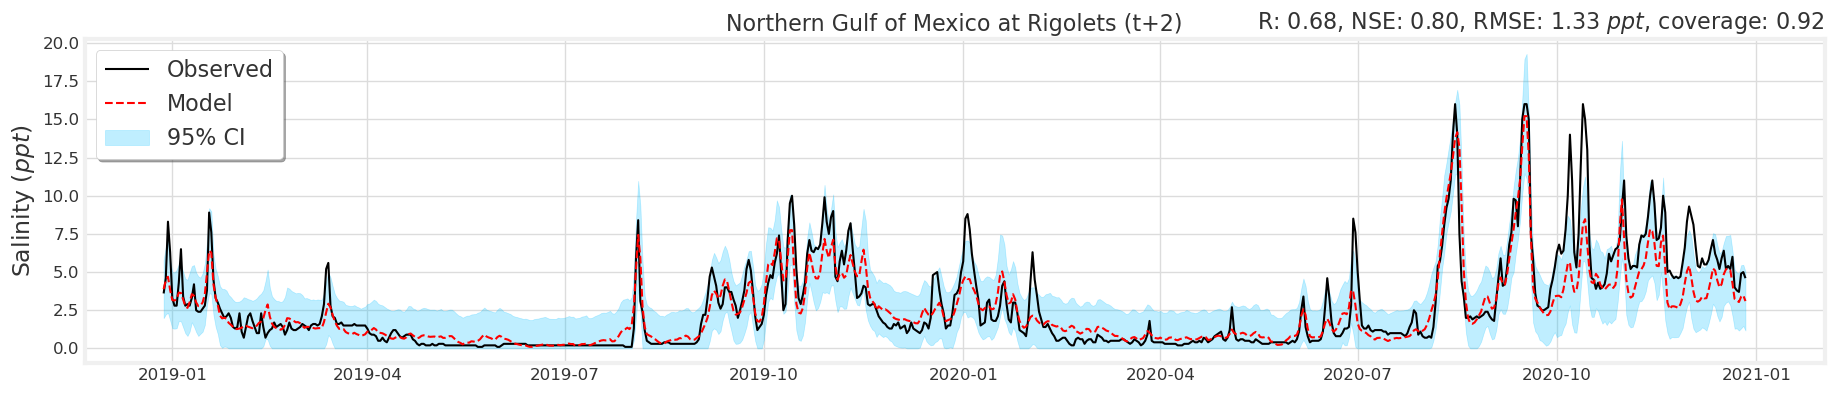

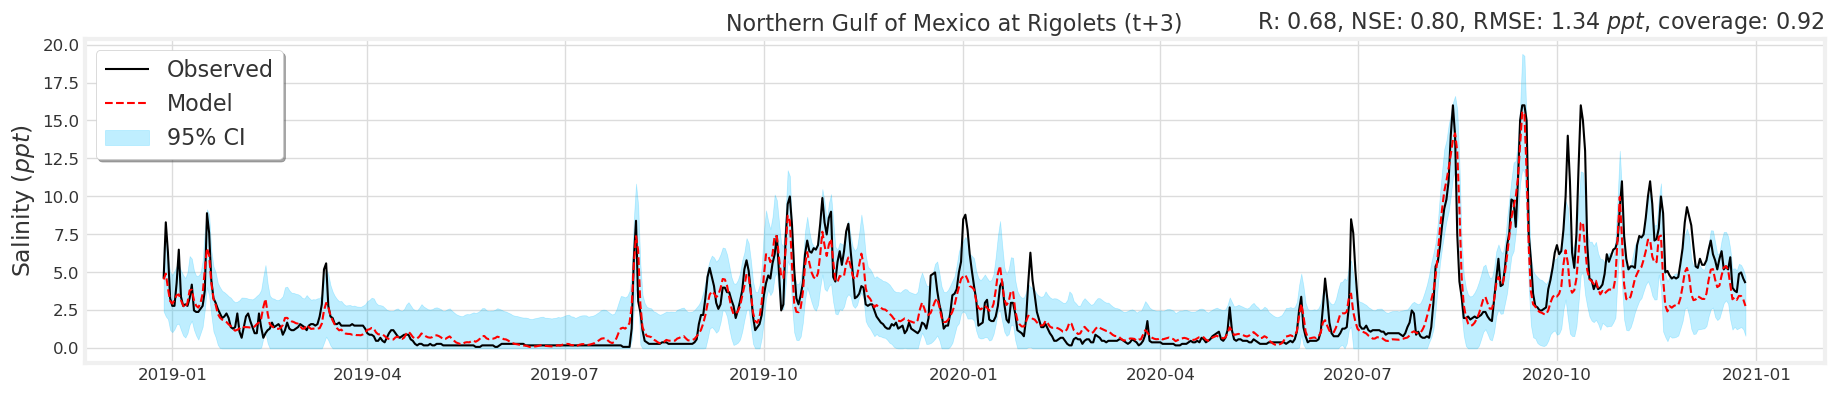

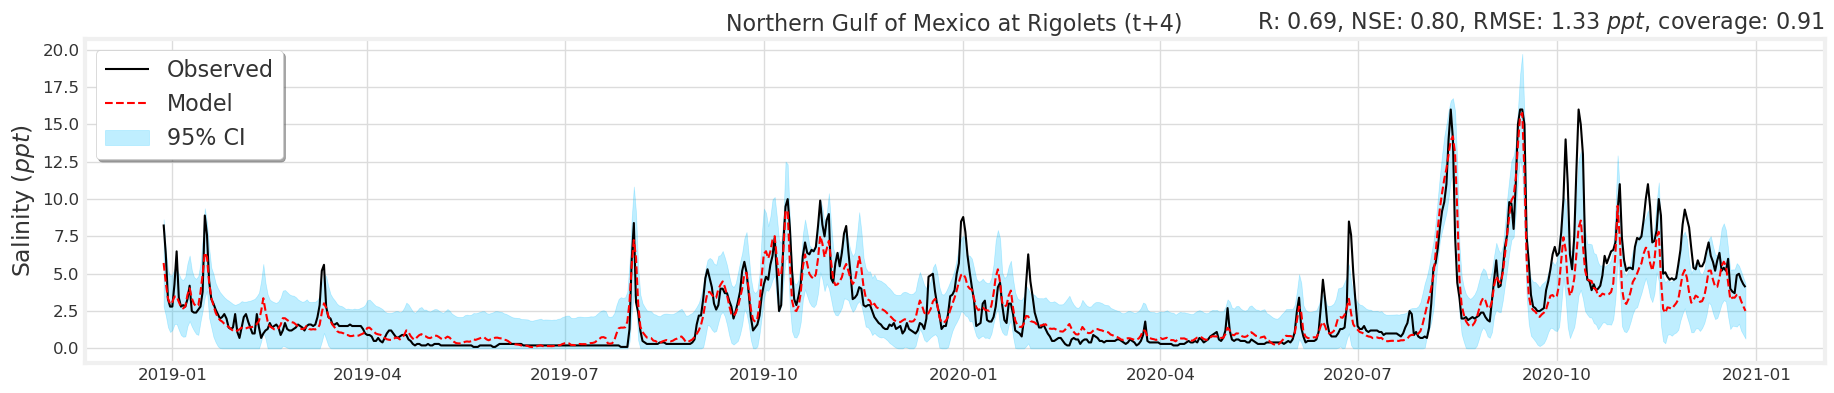

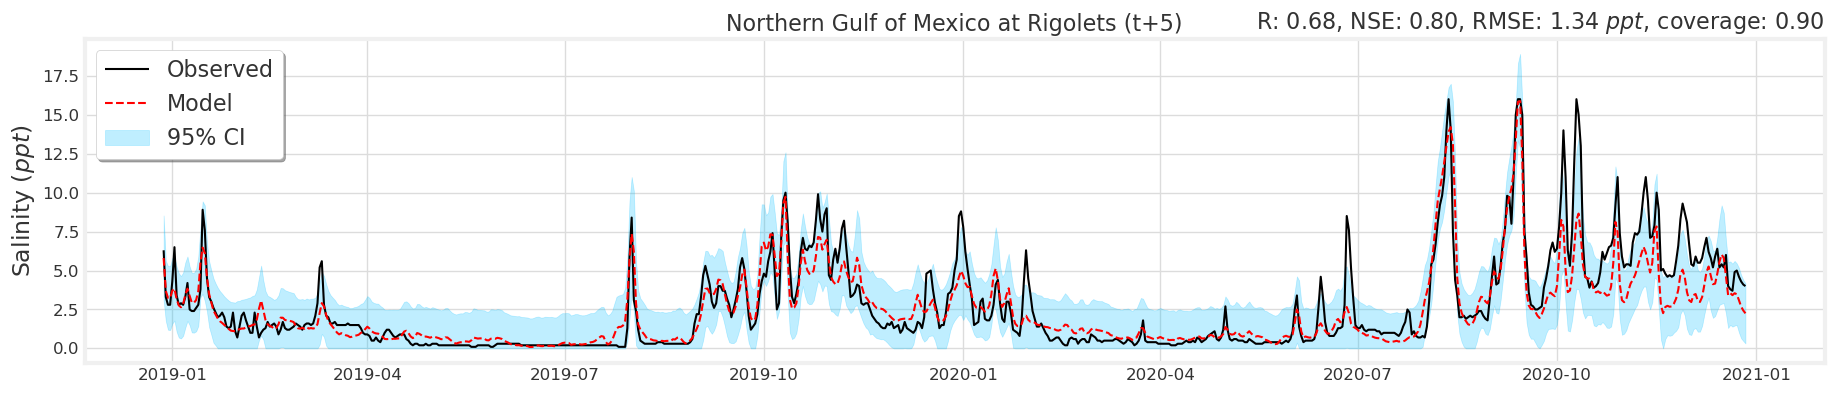

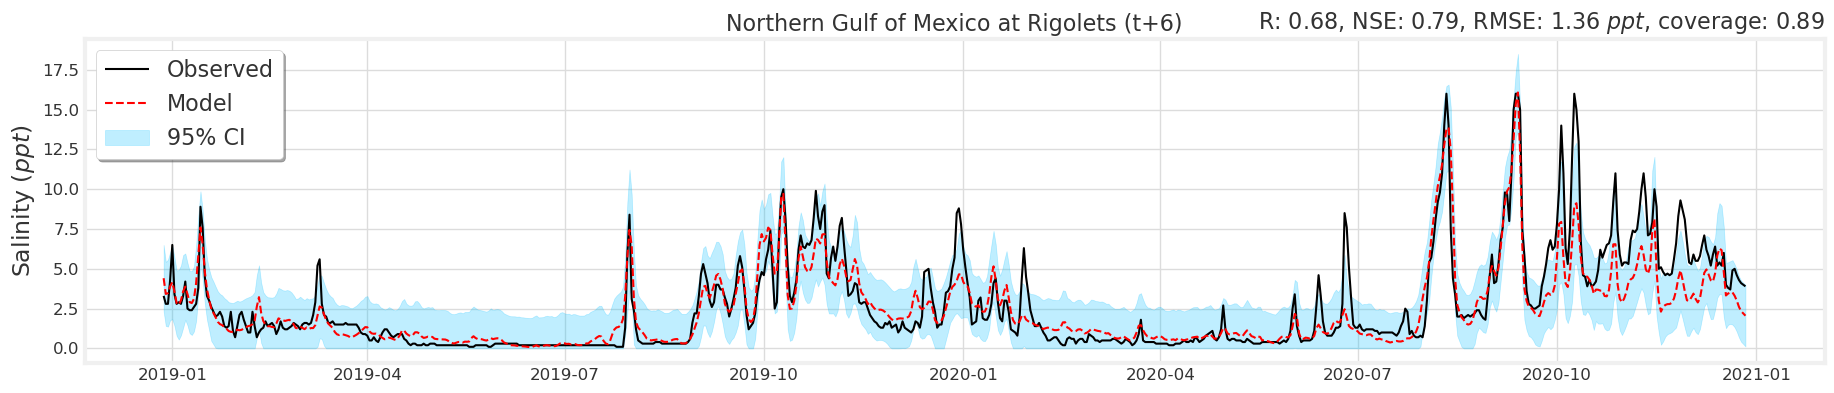

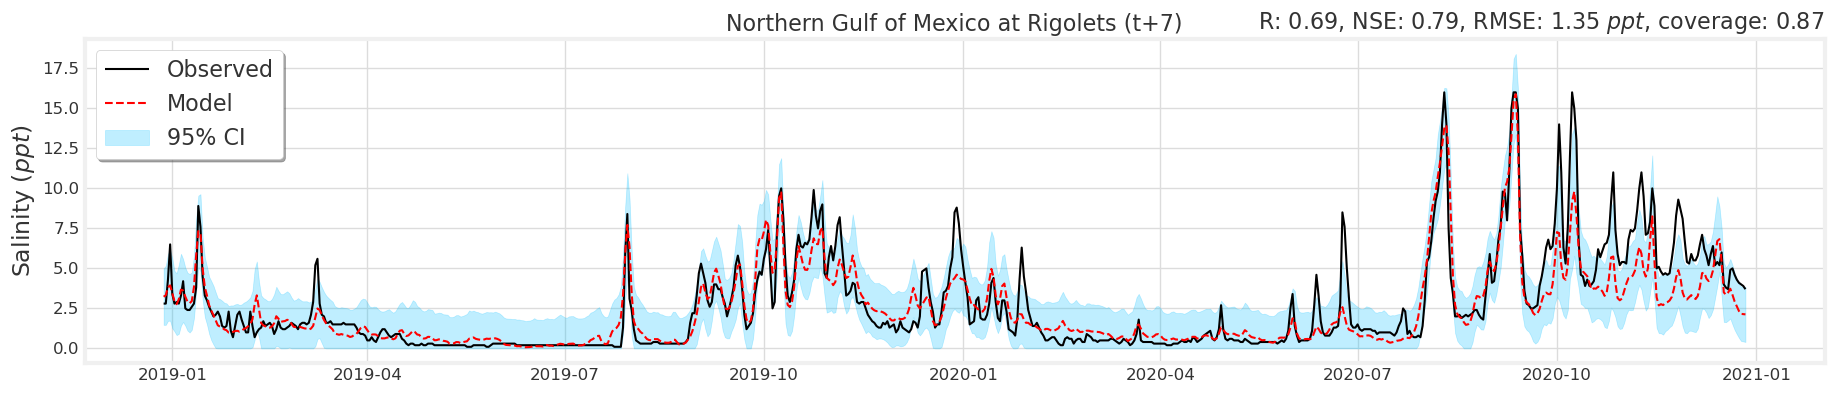

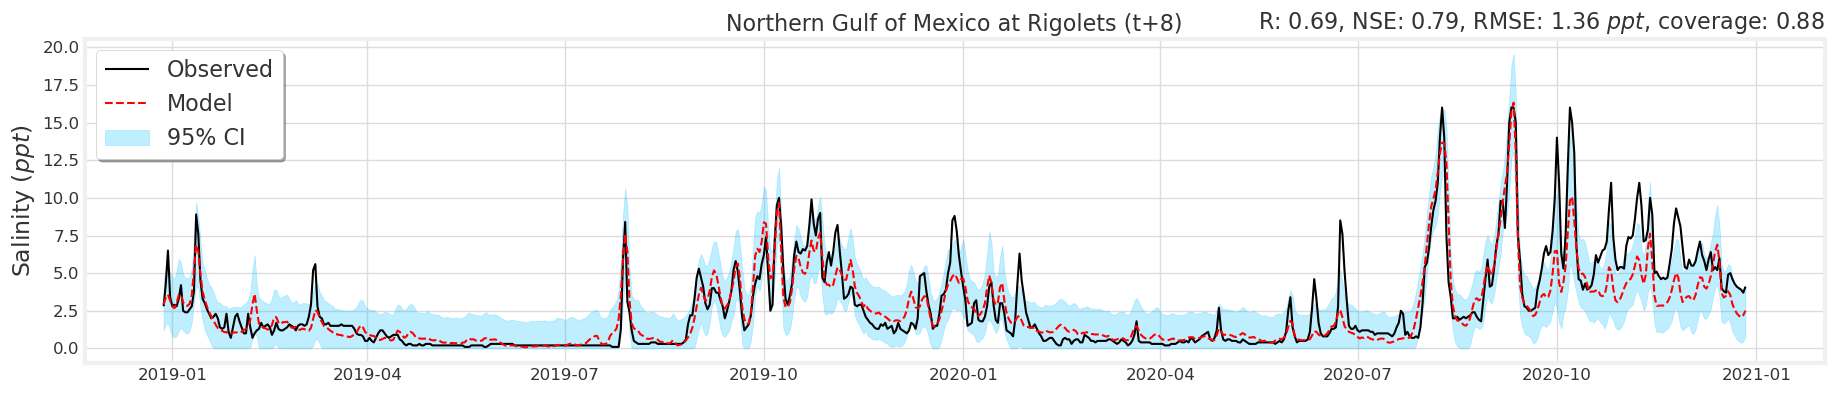

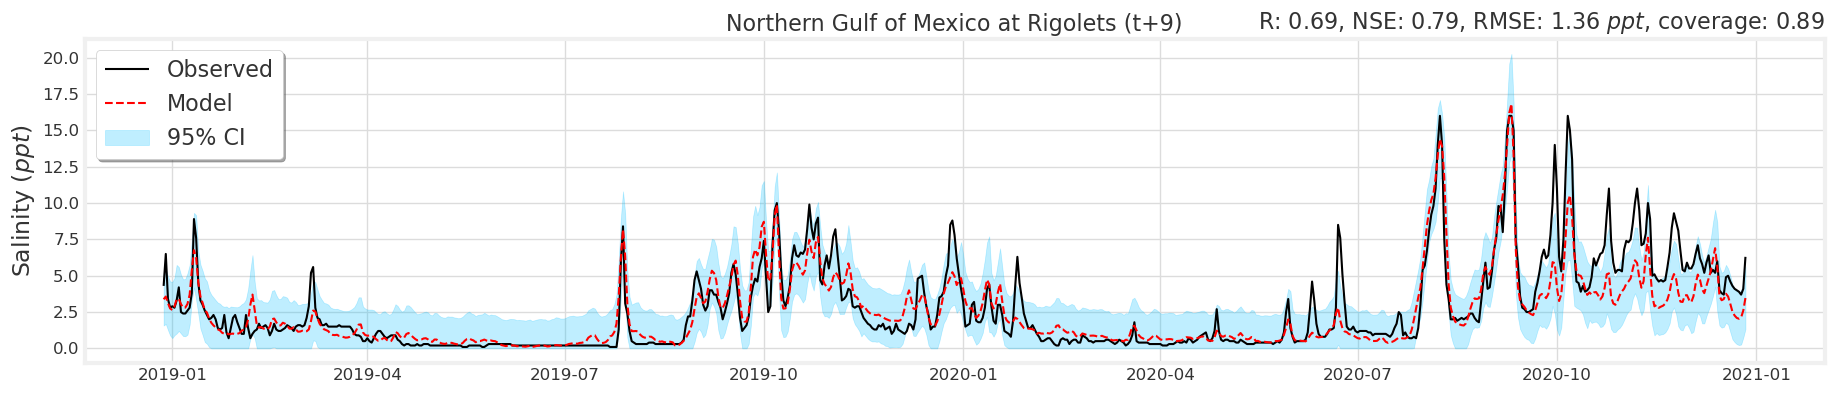

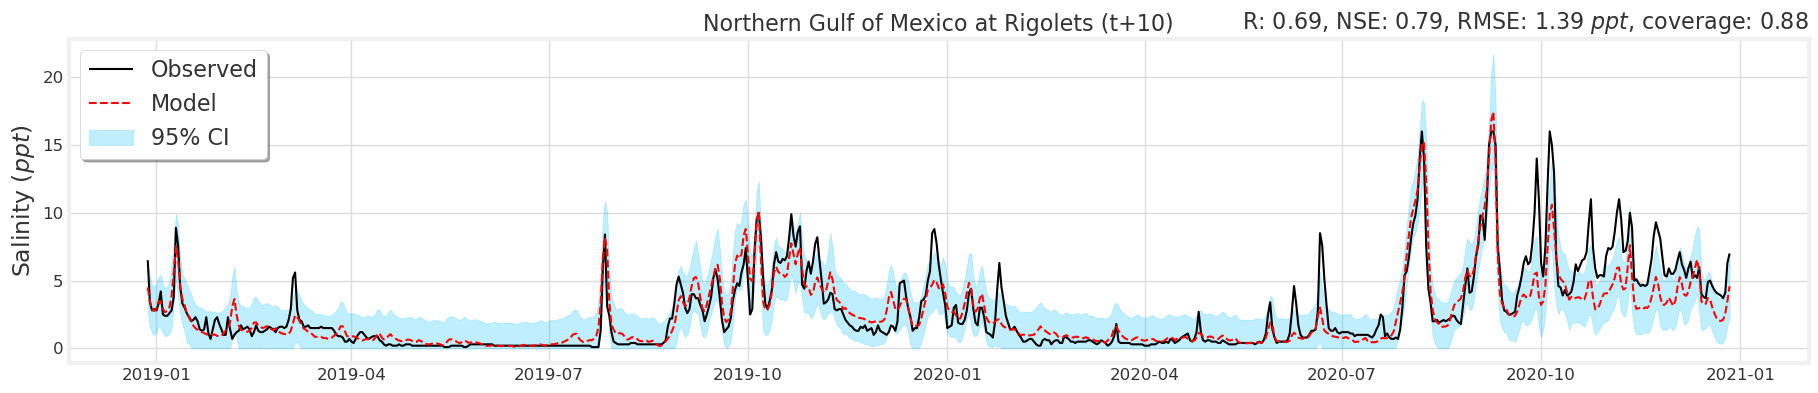

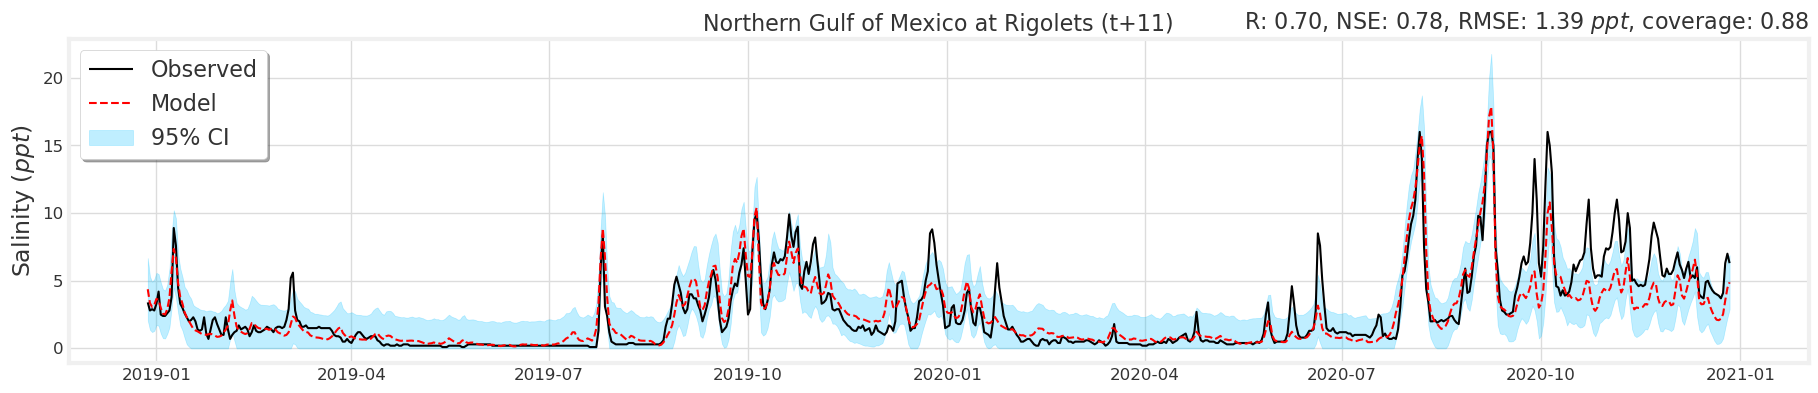

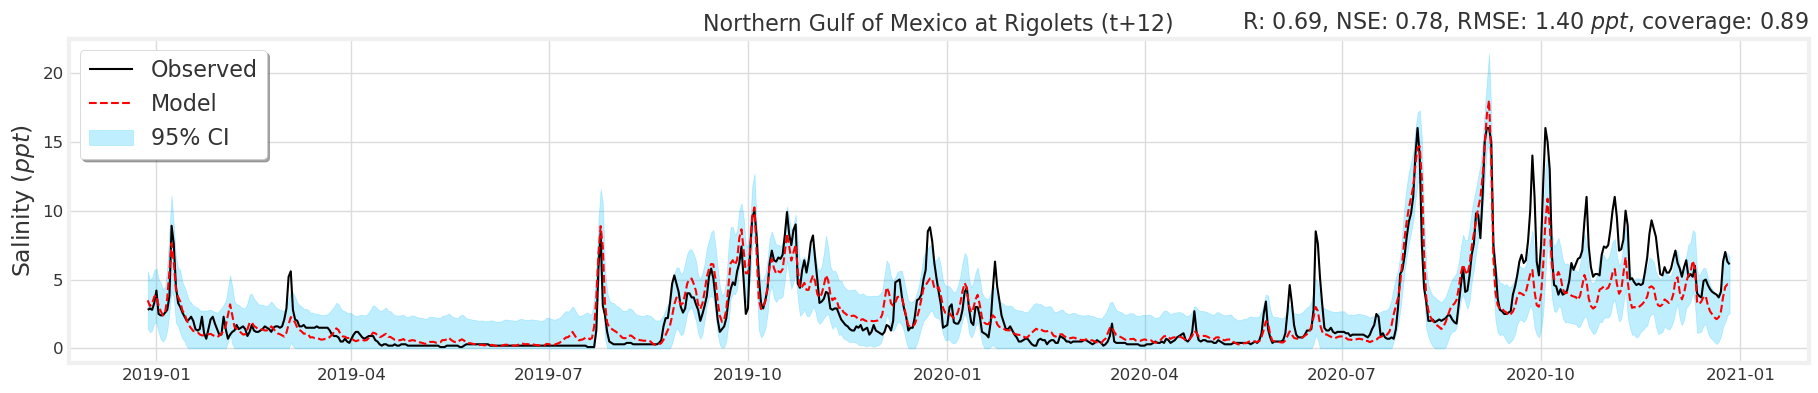

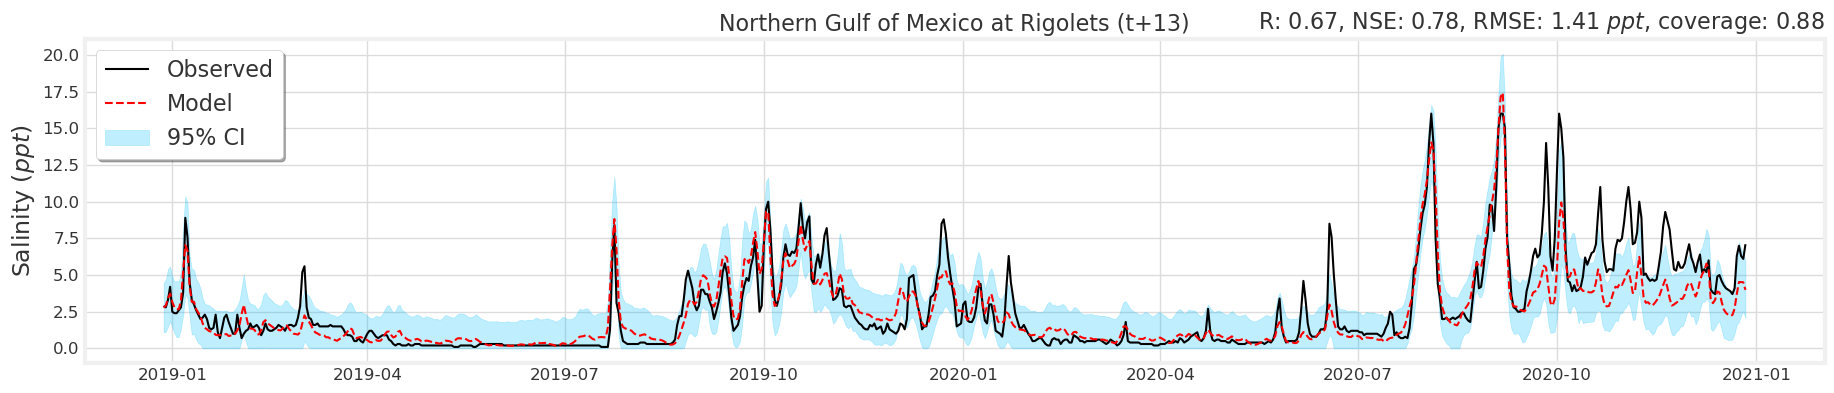

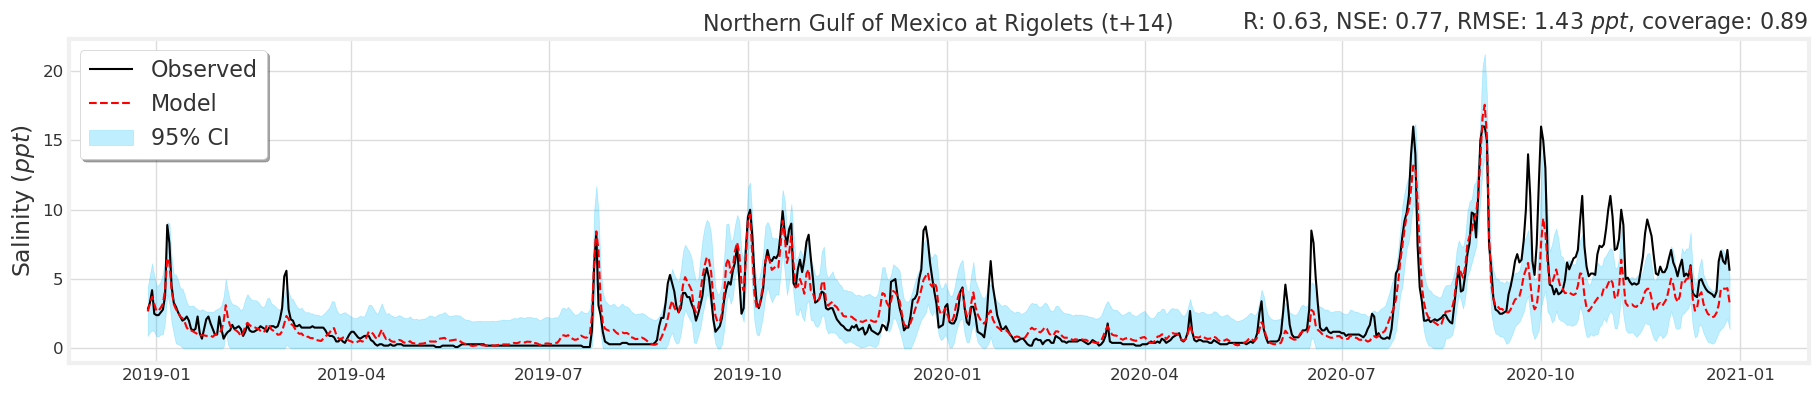

In [10]:
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': 'white',#'#212946',
    'axes.facecolor': 'white',#'#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': True,
    'axes.spines.right': True,
    'axes.spines.top': True,
    'axes.spines.bottom': True,
    'grid.color': '#DCDCDC',#'#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.2',
    'axes.labelcolor': '0.2',
    'xtick.color': '0.2',
    'ytick.color': '0.2',
    'font.size': 12
}
plt.rcParams.update(dark_style)

# numpy array to store all simulations
pred_all = np.zeros(shape=(n_test, iterations))

# load predictions and data
for i in range(steps):
    for itera in range(iterations):
        pred = pd.read_csv(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/95PPU_test_%i.csv' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads, itera)).iloc[:,1:]*conversion_factor #(cfs to cms)
        pred[pred<0]=0
        pred_all[:,itera:itera+1] = pred.iloc[:,i:i+1]
    #     print('pred:', pred)
    data = pd.read_csv(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/y_test.csv' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads)).iloc[:,1:]*conversion_factor #(cfs to cms)
    data = data.iloc[:,i]
    data = pd.DataFrame(data)
    print('data', type(data))
    # calculate mean of all predictions at each time step
    mean, lb, ub, median, se = TNN_functions.stats(pred_all, 0.95)

    # from numpy arrays to dataframes
    s = pd.DataFrame(se)
#     m = pd.DataFrame(pred.iloc[:,i:i+1])
    m = pd.DataFrame(mean)
    
    
    var_test = np.square(se)
    var_val = np.mean(np.square(std_val[i,:]))
    std = np.sqrt(var_test + var_val)
    
    lb = mean - 1.96 * std
    ub = mean + 1.96 * std
    
    lb =pd.DataFrame(lb)
    ub = pd.DataFrame(ub)

    m.to_csv(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/pred_steps_%i.csv' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads,steps))

    # initializing date with the dates set at the beginning of script and create array of dates to concatenate with dataframes
    test_date = datetime.datetime.strptime(date, "%d-%m-%Y")
    K = len(data)
    date_generated = pd.date_range(test_date, periods=K)
    dates = np.array(date_generated.strftime("%m-%d-%Y"))
    dates = np.reshape(dates, (-1, 1))

    # concatenate dates with mean/data/lb/ub
    mean = pd.DataFrame(np.concatenate([dates, m], axis=1))
    data = pd.DataFrame(np.concatenate([dates, data], axis=1))
    lb = pd.DataFrame(np.concatenate([dates, lb], axis=1))
    ub = pd.DataFrame(np.concatenate([dates, ub], axis=1))
    # rename first column as 'date'
    mean.rename(columns={ mean.columns[0]: "date" }, inplace = True)
    data.rename(columns={ data.columns[0]: "date" }, inplace = True)
    lb.rename(columns={lb.columns[0]: "date" }, inplace = True)
    ub.rename(columns={ub.columns[0]: "date" }, inplace = True)
    # set column date as index of each dataframe
    mean=mean.set_index('date')
    mean.index = pd.to_datetime(mean.index).date
    data=data.set_index('date')
    data.index = pd.to_datetime(data.index).date
    lb=lb.set_index('date')
    lb.index = pd.to_datetime(lb.index).date
    ub=ub.set_index('date')
    ub.index = pd.to_datetime(ub.index).date

    # mask data and statistics so all the nans coincide (for figure and to calculate performance metrics)
    mask_data =   data.mask(DataFrame.isna(mean))
    mask_mean =   mean.mask(DataFrame.isna(data))
    mask_lb = lb.mask(DataFrame.isna(data))
    mask_ub = ub.mask(DataFrame.isna(data))

    # convert lower and upper boundaries to numpy arrays and flatten so the dimensions are (K,) to put them together in dataframe bounds
    lb = mask_lb.to_numpy()
    lb = lb.flatten()
    lb[lb<0]=0
    ub = mask_ub.to_numpy()
    ub = ub.flatten()

    # create dataframe removing nans to calculate performance metrics
    mask_data_perf = mask_data.dropna(axis=0)
    mask_mean_perf = mask_mean.dropna(axis=0)

    # bounds dataframe for figure
    bounds = pd.DataFrame([lb, ub]).T
    #rename columns to lb and ub
    columns = ("lb ub").split()
    bounds.columns = columns

    #performance metrics
    NSE1 = 1 - np.sum((mask_mean_perf.iloc[:,-1] - mask_data_perf.iloc[:,0] )**2) /  np.sum((mask_data_perf.iloc[:,0]  - np.mean(mask_data_perf.iloc[:,0] ))**2)
    RMSE1 = math.sqrt(mean_squared_error(mask_data_perf.iloc[:, 0].to_numpy(), mask_mean_perf.iloc[:,-1]))
    R1 = r2_score(mask_mean_perf.iloc[:,-1], mask_data_perf.iloc[:, 0].to_numpy())
#     rmspe = np.sqrt(np.mean(np.square(((mask_data_perf.iloc[:, 0] - mask_mean_perf.iloc[:,-1]) / mask_data_perf.iloc[:, 0])), axis=0))
#     rmspe = RMSE1/np.std(mask_data_perf)
    pbias = (np.sum(mask_data_perf.iloc[:, 0] - mask_mean_perf.iloc[:,-1]))*100/np.sum(mask_data_perf.iloc[:, 0])
    
    pred_in = 0
    pred_out = 0
    
    for j in range(len(mask_data_perf)):
        if (mask_data_perf.iloc[j,0] > bounds.iloc[j,0]) & (mask_data_perf.iloc[j,0] < bounds.iloc[j,-1]):
            pred_in += 1
        else:
            pred_out += 1
    coverage = pred_in/(pred_out+pred_in)
    print('pred_in:', pred_in)
    print('pred_out:', pred_out)
    print('coverage:', coverage)
    
    
    
    variable2 = 'Salinity'
    area2 = 'Northern Gulf of Mexico'
    
    
    
    # figure
    fig, ax=plt.subplots(figsize=(20, 4))
    ax.plot(mask_data, label='Observed', linestyle = '-', linewidth= '1.5', color='black')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
    ax.plot(mask_mean.iloc[:,-1],label='Model', linestyle = '--', linewidth = '1.5', c='red')
    ax.fill_between(
        mask_mean.index,
        bounds['lb'],
        bounds['ub'],
        color = 'deepskyblue',
        alpha = 0.25,
        label = '95% CI'
    )
    # ax.yaxis.set_major_formatter(ticker.EngFormatter())
    

    ax.set_ylabel(variable2 +' ('+units+')', fontsize=17)
    ax.set_title(area2 + ' at ' + station +' (t+%i)' %(i+1), fontsize=16)
    ax.text(1, 1.05,'R: %.2f, NSE: %.2f, RMSE: %.2f ' %(R1, NSE1, RMSE1)+units+', coverage: %.2f'  % (coverage), horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, fontsize = 16)

#     ax.text(0.9, 1.05,'R: %.2f, NSE: %.2f, RMSE: %.2f ' %(R1, NSE1, RMSE1)+units+', pbias: %.2f'  % (pbias), horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, fontsize = 16)
#     ax.text(1.05, 1.05,'R: %.2f, NSE: %.2f, RMSE: %.2f ' %(R1, NSE1, RMSE1)+units+', rmspe: %.2f, pbias: %.2f'  % (rmspe, pbias), horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, fontsize = 16)
    ax.legend(loc = 'upper left',fancybox=True, shadow=True, facecolor='white', fontsize=16);

#     plt.savefig(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/fig%i.png' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads,i), bbox_inches='tight', facecolor='w', dpi=72)
#     plt.show()

In [11]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(test_X.columns)
test_X.shape

(731, 14, 7497)

In [12]:
# testing

# num_posterior = 1
# num_variables = num_variables - 1

# testing

aux = [69,204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60]
# rate = [2.0, 1.75, 1.5, 1.25, 0.75, 0.5, 0.25, 0.0]
rate = [1.5, 0.5]

NUMP = np.zeros((test_X.shape[0], iterations))
OUTPUT_TOTAL = np.zeros((test_X.shape[0], num_variables * len(rate)))
# OUTPUT[:,:1] = m

count = 0
idx_output = 0

for j in range(len(rate)):

    idx = 0
    OUTPUT = np.zeros((test_X.shape[0], num_variables))

    for i in range(num_posterior-1):

        idx2 = aux[i] + idx
        test_X_aux = test_X.copy()
        test_X_aux[:,:,idx:idx2] = test_X[:,:,idx:idx2].copy() * rate[j]

        for n in range(iterations):
            
            ckpt = tf.train.Checkpoint(transformer=transformer)
            ckpt.restore(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/weights/ckpt_(%i)-1' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads,n))
            dist_ts, y_hat_inv_scaled, y_test_inv_scaled = TNN_test.test_informer(transformer,
                                                                              test_y_targets, 
                                                                              MC_iterations, 
                                                                              n_test, 
                                                                              test_X_aux, 
                                                                              train_y_mean, 
                                                                              train_y_std, 
                                                                              steps)

            NUMP[:,n:] = dist_ts.iloc[:,-1:]

    #     print(NUMP)

        mean, lb, ub, median, se = TNN_functions.stats(NUMP, 0.95)
        mn = pd.DataFrame(mean)
        OUTPUT[:,i:] = mn

        idx += aux[i]
#         print('idx',idx)
        count +=1
        print(count)
        
    for i in range(num_posterior-1,num_variables-1):

        idx2 = aux[i] + idx
        test_X_aux = test_X.copy()
#         print('aux', idx2)

        for k in range(steps):
            test_X_aux[:,:,idx+(aux[i]+aux[i+1]+aux[i+2]+aux[i+3]+aux[i+4])*k:idx2+(aux[i]+aux[i+1]+aux[i+2]+aux[i+3]+aux[i+4])*k] = test_X[:,:,idx+(aux[i]+aux[i+1]+aux[i+2]+aux[i+3]+aux[i+4])*k:idx2+(aux[i]+aux[i+1]+aux[i+2]+aux[i+3]+aux[i+4])*k].copy() * rate[j]

#         jk = test_X_aux[:,0,:] - test_X[:,0,:]
#         pd.DataFrame(jk).to_csv(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/jk.csv' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads))
        for n in range(iterations):
            
            ckpt = tf.train.Checkpoint(transformer=transformer)
            ckpt.restore(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/weights/ckpt_(%i)-1' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads,n))
            dist_ts, y_hat_inv_scaled, y_test_inv_scaled = TNN_test.test_informer(transformer,
                                                                              test_y_targets, 
                                                                              MC_iterations, 
                                                                              n_test, 
                                                                              test_X_aux, 
                                                                              train_y_mean, 
                                                                              train_y_std, 
                                                                              steps)

            NUMP[:,n:] = dist_ts.iloc[:,-1:]

    #     print(NUMP)

        mean, lb, ub, median, se = TNN_functions.stats(NUMP, 0.95)
        mn = pd.DataFrame(mean)
        OUTPUT[:,i:] = mn

        idx += aux[i]
#         print('idx',idx)
        count +=1
        print(count)
#         print('output:', OUTPUT)
        
    OUTPUT_TOTAL[:,idx_output:idx_output+num_variables] = OUTPUT[:,:]
    print('out:', OUTPUT_TOTAL[:,idx_output:idx_output+len(aux)])
        
    idx_output += num_variables

1
2
3
4
5
6
out: [[2.56400714 2.70151985 2.69007285 ... 0.         0.         0.        ]
 [3.14927075 3.12934232 3.37644031 ... 0.         0.         0.        ]
 [3.62855544 3.56879807 4.06032403 ... 0.         0.         0.        ]
 ...
 [4.41780875 3.95213749 4.82815707 ... 0.         0.         0.        ]
 [4.44703159 4.03386149 4.98639987 ... 0.         0.         0.        ]
 [3.37345593 3.26434455 3.66038494 ... 0.         0.         0.        ]]
7
8
9
10
11
12
out: [[2.74455755 2.68533795 2.81731186 ... 2.45364103 2.76612399 2.76612399]
 [3.31530573 3.65621135 3.18866518 ... 3.06619289 3.48460085 3.48460085]
 [3.79753017 4.20042861 3.56298914 ... 3.53543701 4.00934544 4.00934544]
 ...
 [4.13444178 4.606652   3.5355865  ... 4.27704897 4.6100183  4.6100183 ]
 [4.20888765 4.57035511 3.63220947 ... 4.30050228 4.78470044 4.78470044]
 [3.19739747 3.27591345 2.96618965 ... 3.33367333 3.63678908 3.63678908]]


In [13]:
pd.DataFrame(OUTPUT_TOTAL)

0         1         2         3         4         5         6   \
0    2.564007  2.701520  2.690073  3.120588  2.944782  2.605926  2.605926   
1    3.149271  3.129342  3.376440  3.815185  3.468138  3.026490  3.026490   
2    3.628555  3.568798  4.060324  4.352346  3.897609  3.515057  3.515057   
3    3.152831  3.223679  3.455724  3.654869  3.478526  3.040978  3.040978   
4    2.665058  2.721778  2.739802  3.040970  2.927022  2.579766  2.579766   
..        ...       ...       ...       ...       ...       ...       ...   
726  4.497823  3.849906  4.361843  4.303709  4.108962  3.764398  3.764398   
727  4.450278  3.970296  4.596860  4.443857  4.227334  3.911818  3.911818   
728  4.417809  3.952137  4.828157  4.523821  4.267202  4.000201  4.000201   
729  4.447032  4.033861  4.986400  4.521729  4.334063  3.949487  3.949487   
730  3.373456  3.264345  3.660385  3.563420  3.241520  3.036799  3.036799   

           7         8         9         10        11        12        13  
0    2.744558  2.685338  2.817312  2.267012  2.453641  2.766124  2.766124  
1    3.315306  3.656211  3.188665  2.669761  3.066193  3.484601  3.484601  
2    3.797530  4.200429  3.562989  3.173734  3.535437  4.009345  4.009345  
3    3.251647  3.297467  3.105986  2.811381  2.972150  3.416576  3.416576  
4    2.717993  2.582411  2.788719  2.431555  2.407972  2.840223  2.840223  
..        ...       ...       ...       ...       ...       ...       ...  
726  4.043511  4.739160  3.862881  4.049170  4.287009  4.771440  4.771440  
727  4.123814  4.554484  3.705418  4.050676  4.266312  4.651384  4.651384  
728  4.134442  4.606652  3.535587  4.107199  4.277049  4.610018  4.610018  
729  4.208888  4.570355  3.632209  4.172878  4.300502  4.784700  4.784700  
730  3.197397  3.275913  2.966190  2.984971  3.333673  3.636789  3.636789  

[731 rows x 14 columns]

In [14]:
pd.DataFrame(OUTPUT_TOTAL)

m_broadcast = pd.DataFrame(np.repeat(m.values, num_variables * len(rate), axis=1)) 
delta_out = pd.DataFrame(OUTPUT_TOTAL).subtract(m_broadcast)
print(delta_out)

delta_out_median = pd.DataFrame(delta_out.median(axis=0))
delta_out_mean = pd.DataFrame(delta_out.mean(axis=0))

sensitivity_delta_out_mean = (delta_out_mean)
sensitivity_delta_out_median = (delta_out_median)
sensitivity_delta_out_mean.rename(columns={ sensitivity_delta_out_mean.columns[0]: "values" }, inplace = True)
sensitivity_delta_out_median.rename(columns={ sensitivity_delta_out_median.columns[0]: "values" }, inplace = True)

sensitivity_np = np.array(sensitivity_delta_out_mean)
# print(delta_out.iloc[:,40])
print(pd.DataFrame(sensitivity_np.reshape((len(rate), num_variables))).T.head(8))

           0         1         2         3         4         5         6   \
0   -0.101397  0.036116  0.024669  0.455185  0.279378 -0.059478 -0.059478   
1   -0.099199 -0.119127  0.127971  0.566715  0.219668 -0.221979 -0.221979   
2   -0.099854 -0.159611  0.331915  0.623937  0.169199 -0.213353 -0.213353   
3   -0.062694  0.008154  0.240199  0.439344  0.263000 -0.174548 -0.174548   
4   -0.040891  0.015830  0.033854  0.335022  0.221073 -0.126183 -0.126183   
..        ...       ...       ...       ...       ...       ...       ...   
726  0.198349 -0.449568  0.062370  0.004235 -0.190511 -0.535076 -0.535076   
727  0.131815 -0.348166  0.278397  0.125395 -0.091128 -0.406644 -0.406644   
728  0.119953 -0.345718  0.530302  0.225966 -0.030654 -0.297655 -0.297655   
729  0.102656 -0.310515  0.642024  0.177353 -0.010313 -0.394889 -0.394889   
730  0.078051 -0.031060  0.364980  0.268015 -0.053885 -0.258606 -0.258606   

           7         8         9         10        11        12        13  

In [15]:
Tp50 = [0.110707, 0.173413, 0.169774, 0.194023]
tm50 = [-0.089994, -0.155120, -0.178671, -0.192699]
rp50 = [-0.004602, 0.020086, 0.058964, 0.061793]
rm50 = [0.032363, 0.014678, -0.049453, -0.026782]
vp50 = [0.026402, 0.041370, 0.067451, 0.078348]
vm50 = [0.022963, -0.014431, -0.066140,-0.050922]
up50 = [0.553580, 0.556417, 0.447420, 0.313959]
um50 = [-0.389871, -0.454284, -0.455970, -0.338203]
Qp50 = [-0.230572, -0.294729, -0.332312, -0.321747]
Qm50 = [0.478988, 0.515620, 0.500846, 0.468815]
Pp50 = [0.106513, 0.074901, 0.050216, 0.074910]
Pm50 = [-0.073808, -0.060928, -0.067655,-0.065518]

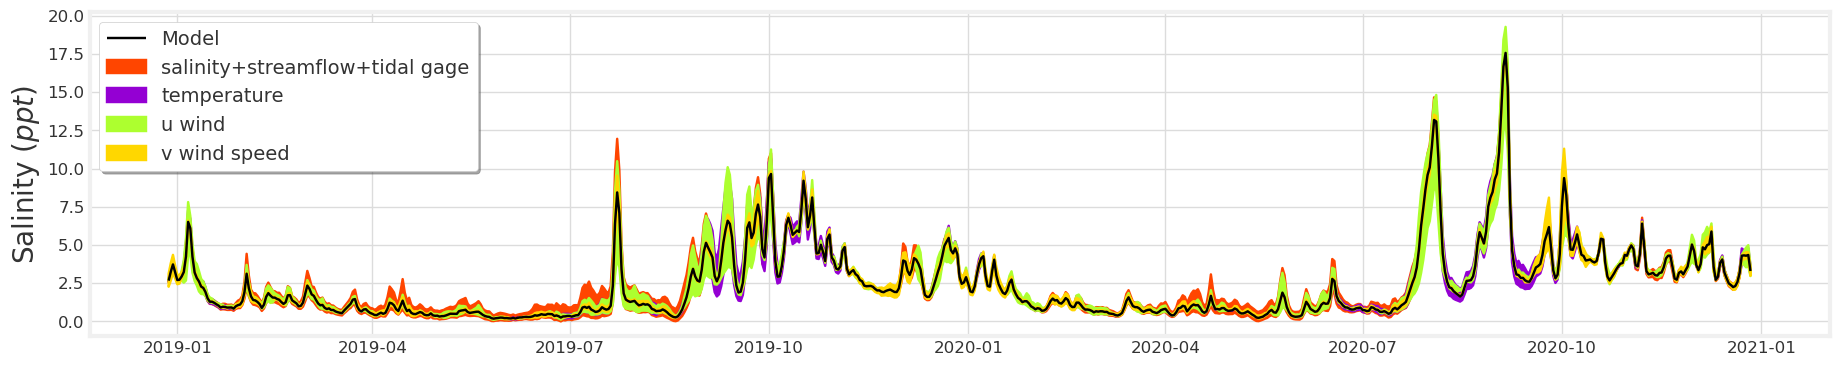

In [16]:
out = pd.DataFrame(OUTPUT_TOTAL)

model = pd.DataFrame(np.concatenate([dates, m], axis=1))
model.rename(columns={model.columns[0]: "date" }, inplace = True)
model=model.set_index('date')
model.index = pd.to_datetime(model.index).date
model = pd.DataFrame(model)


alpha = 1
linewidth = 1.75
fig, ax=plt.subplots(figsize=(20, 4))
ax.set_ylabel('Salinity' +' ('+units+')', fontsize=20)

lb = out.iloc[:,0]
lb = lb.values.reshape(-1,1)
lb = pd.DataFrame(np.concatenate([dates, lb], axis=1))
lb.rename(columns={lb.columns[0]: "date" }, inplace = True)
lb=lb.set_index('date')
lb.index = pd.to_datetime(lb.index).date
lb = lb.to_numpy()
lb = lb.flatten()

ub = out.iloc[:,num_variables*(len(rate)-1)+0]
ub = ub.values.reshape(-1,1)
ub = pd.DataFrame(np.concatenate([dates, ub], axis=1))
ub.rename(columns={ub.columns[0]: "date" }, inplace = True)
ub=ub.set_index('date')
ub.index = pd.to_datetime(ub.index).date
ub = ub.to_numpy()
ub = ub.flatten()
# bounds dataframe for figure
bounds = pd.DataFrame([lb, ub]).T
#rename columns to lb and ub
columns = ("lb ub").split()
bounds.columns = columns

ax.fill_between(
        model.index,
        bounds['ub'],
        bounds['lb'],
        color = 'orangered',
        hatch='',
        edgecolor="orangered",
        linewidth = linewidth,
        alpha = 1,
        label = 'salinity+streamflow+tidal gage'
    )

lb = out.iloc[:,5]
lb = lb.values.reshape(-1,1)
lb = pd.DataFrame(np.concatenate([dates, lb], axis=1))
lb.rename(columns={lb.columns[0]: "date" }, inplace = True)
lb=lb.set_index('date')
lb.index = pd.to_datetime(lb.index).date
lb = lb.to_numpy()
lb = lb.flatten()

ub = out.iloc[:,num_variables*(len(rate)-1)+5]
ub = ub.values.reshape(-1,1)
ub = pd.DataFrame(np.concatenate([dates, ub], axis=1))
ub.rename(columns={ub.columns[0]: "date" }, inplace = True)
ub=ub.set_index('date')
ub.index = pd.to_datetime(ub.index).date
ub = ub.to_numpy()
ub = ub.flatten()
# bounds dataframe for figure
bounds = pd.DataFrame([lb, ub]).T
#rename columns to lb and ub
columns = ("lb ub").split()
bounds.columns = columns

ax.fill_between(
        model.index,
        bounds['ub'],
        bounds['lb'],
        color = 'darkviolet',
        hatch='',
        edgecolor="darkviolet",
    linestyle='-',#(0,(5,1)),
    linewidth = linewidth,
        alpha =1,
        label = 'temperature'
    )


# lb = out.iloc[:,0]
# lb = lb.values.reshape(-1,1)
# lb = pd.DataFrame(np.concatenate([dates, lb], axis=1))
# lb.rename(columns={lb.columns[0]: "date" }, inplace = True)
# lb=lb.set_index('date')
# lb.index = pd.to_datetime(lb.index).date
# lb = lb.to_numpy()
# lb = lb.flatten()

# ub = out.iloc[:,num_variables*(len(rate)-1)+0]
# ub = ub.values.reshape(-1,1)
# ub = pd.DataFrame(np.concatenate([dates, ub], axis=1))
# ub.rename(columns={ub.columns[0]: "date" }, inplace = True)
# ub=ub.set_index('date')
# ub.index = pd.to_datetime(ub.index).date
# ub = ub.to_numpy()
# ub = ub.flatten()
# # bounds dataframe for figure
# bounds = pd.DataFrame([lb, ub]).T
# #rename columns to lb and ub
# columns = ("lb ub").split()
# bounds.columns = columns

# ax.fill_between(
#         model.index,
#         bounds['ub'],
#         bounds['lb'],
#         color = 'orange',
#         hatch='',
#         edgecolor="orange",
#     linestyle='-',#(0,(5,1)),
#     linewidth = linewidth,
#         alpha =1,
#         label = 'streamflow'
#     )

lb = out.iloc[:,2]
lb = lb.values.reshape(-1,1)
lb = pd.DataFrame(np.concatenate([dates, lb], axis=1))
lb.rename(columns={lb.columns[0]: "date" }, inplace = True)
lb=lb.set_index('date')
lb.index = pd.to_datetime(lb.index).date
lb = lb.to_numpy()
lb = lb.flatten()

ub = out.iloc[:,num_variables*(len(rate)-1)+2]
ub = ub.values.reshape(-1,1)
ub = pd.DataFrame(np.concatenate([dates, ub], axis=1))
ub.rename(columns={ub.columns[0]: "date" }, inplace = True)
ub=ub.set_index('date')
ub.index = pd.to_datetime(ub.index).date
ub = ub.to_numpy()
ub = ub.flatten()
# bounds dataframe for figure
bounds = pd.DataFrame([lb, ub]).T
#rename columns to lb and ub
columns = ("lb ub").split()
bounds.columns = columns

ax.fill_between(
        model.index,
        bounds['ub'],
        bounds['lb'],
        color = 'greenyellow',
        hatch='',
        edgecolor="greenyellow",
    linestyle='-',#(0,(5,1)),
    linewidth = linewidth,
        alpha =1,
        label = 'u wind'
    )

lb = out.iloc[:,3]
lb = lb.values.reshape(-1,1)
lb = pd.DataFrame(np.concatenate([dates, lb], axis=1))
lb.rename(columns={lb.columns[0]: "date" }, inplace = True)
lb=lb.set_index('date')
lb.index = pd.to_datetime(lb.index).date
lb = lb.to_numpy()
lb = lb.flatten()

ub = out.iloc[:,num_variables*(len(rate)-1)+3]
ub = ub.values.reshape(-1,1)
ub = pd.DataFrame(np.concatenate([dates, ub], axis=1))
ub.rename(columns={ub.columns[0]: "date" }, inplace = True)
ub=ub.set_index('date')
ub.index = pd.to_datetime(ub.index).date
ub = ub.to_numpy()
ub = ub.flatten()
# bounds dataframe for figure
bounds = pd.DataFrame([lb, ub]).T
#rename columns to lb and ub
columns = ("lb ub").split()
bounds.columns = columns

ax.fill_between(
        model.index,
        bounds['ub'],
        bounds['lb'],
        color = 'gold',
        hatch='',
        edgecolor="gold",
        linewidth = linewidth,
        alpha = 1,
        label = 'v wind speed'
    )

ax.plot(model, label='Model', linestyle = '-', linewidth= linewidth, color='black')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.grid(True)
ax.legend(loc = 'upper left',fancybox=True, shadow=True, facecolor='white', fontsize=14);

1
2
3
4
5
6
out: [[2.63431697 2.66012278 2.62496338 ... 0.         0.         0.        ]
 [3.21547558 3.19388242 3.21091273 ... 0.         0.         0.        ]
 [3.69268444 3.6454354  3.77701097 ... 0.         0.         0.        ]
 ...
 [4.30612528 4.21304781 4.40917354 ... 0.         0.         0.        ]
 [4.3511905  4.27747483 4.47267253 ... 0.         0.         0.        ]
 [3.30035923 3.28080587 3.36460953 ... 0.         0.         0.        ]]
7
8
9
10
11
12
out: [[2.6707124  2.6501405  2.68789651 ... 2.61382651 2.66910489 2.66910489]
 [3.24863012 3.27733796 3.24795134 ... 3.19111495 3.28006563 3.28006563]
 [3.7252888  3.79555931 3.66512742 ... 3.68896122 3.76167178 3.76167178]
 ...
 [4.24907472 4.34353395 4.13076277 ... 4.28034177 4.34036717 4.34036717]
 [4.30433207 4.37385409 4.18152945 ... 4.32526445 4.41194539 4.41194539]
 [3.26419113 3.28075485 3.20783577 ... 3.29117937 3.34845581 3.34845581]]
           0         1         2         3         4         5         6   

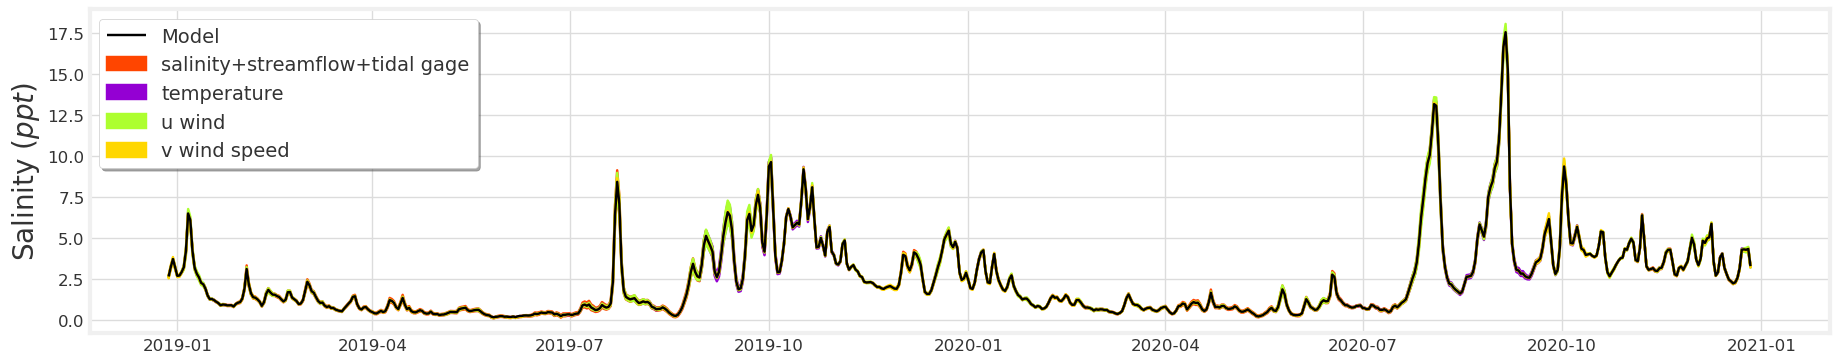

In [17]:
# testing

aux = [69,204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60]
# rate = [2.0, 1.75, 1.5, 1.25, 0.75, 0.5, 0.25, 0.0]
rate = [1.1, 0.9]

NUMP = np.zeros((test_X.shape[0], iterations))
OUTPUT_TOTAL = np.zeros((test_X.shape[0], num_variables * len(rate)))
# OUTPUT[:,:1] = m

count = 0
idx_output = 0

for j in range(len(rate)):

    idx = 0
    OUTPUT = np.zeros((test_X.shape[0], num_variables))

    for i in range(num_posterior-1):

        idx2 = aux[i] + idx
        test_X_aux = test_X.copy()
        test_X_aux[:,:,idx:idx2] = test_X[:,:,idx:idx2].copy() * rate[j]

        for n in range(iterations):
            
            ckpt = tf.train.Checkpoint(transformer=transformer)
            ckpt.restore(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/weights/ckpt_(%i)-1' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads,n))
            dist_ts, y_hat_inv_scaled, y_test_inv_scaled = TNN_test.test_informer(transformer,
                                                                              test_y_targets, 
                                                                              MC_iterations, 
                                                                              n_test, 
                                                                              test_X_aux, 
                                                                              train_y_mean, 
                                                                              train_y_std, 
                                                                              steps)

            NUMP[:,n:] = dist_ts.iloc[:,-1:]

    #     print(NUMP)

        mean, lb, ub, median, se = TNN_functions.stats(NUMP, 0.95)
        mn = pd.DataFrame(mean)
        OUTPUT[:,i:] = mn

        idx += aux[i]
#         print('idx',idx)
        count +=1
        print(count)
        
    for i in range(num_posterior-1,num_variables-1):

        idx2 = aux[i] + idx
        test_X_aux = test_X.copy()
#         print('aux', idx2)

        for k in range(steps):
            test_X_aux[:,:,idx+(aux[i]+aux[i+1]+aux[i+2]+aux[i+3]+aux[i+4])*k:idx2+(aux[i]+aux[i+1]+aux[i+2]+aux[i+3]+aux[i+4])*k] = test_X[:,:,idx+(aux[i]+aux[i+1]+aux[i+2]+aux[i+3]+aux[i+4])*k:idx2+(aux[i]+aux[i+1]+aux[i+2]+aux[i+3]+aux[i+4])*k].copy() * rate[j]

#         jk = test_X_aux[:,0,:] - test_X[:,0,:]
#         pd.DataFrame(jk).to_csv(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/jk.csv' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads))
        for n in range(iterations):
            
            ckpt = tf.train.Checkpoint(transformer=transformer)
            ckpt.restore(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/weights/ckpt_(%i)-1' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads,n))
            dist_ts, y_hat_inv_scaled, y_test_inv_scaled = TNN_test.test_informer(transformer,
                                                                              test_y_targets, 
                                                                              MC_iterations, 
                                                                              n_test, 
                                                                              test_X_aux, 
                                                                              train_y_mean, 
                                                                              train_y_std, 
                                                                              steps)

            NUMP[:,n:] = dist_ts.iloc[:,-1:]

    #     print(NUMP)

        mean, lb, ub, median, se = TNN_functions.stats(NUMP, 0.95)
        mn = pd.DataFrame(mean)
        OUTPUT[:,i:] = mn

        idx += aux[i]
#         print('idx',idx)
        count +=1
        print(count)
#         print('output:', OUTPUT)
        
    OUTPUT_TOTAL[:,idx_output:idx_output+num_variables] = OUTPUT[:,:]
    print('out:', OUTPUT_TOTAL[:,idx_output:idx_output+len(aux)])
        
    idx_output += num_variables
    
###########################################################################################################################

pd.DataFrame(OUTPUT_TOTAL)

m_broadcast = pd.DataFrame(np.repeat(m.values, num_variables * len(rate), axis=1)) 
delta_out = pd.DataFrame(OUTPUT_TOTAL).subtract(m_broadcast)
print(delta_out)

delta_out_median = pd.DataFrame(delta_out.median(axis=0))
delta_out_mean = pd.DataFrame(delta_out.mean(axis=0))

sensitivity_delta_out_mean = (delta_out_mean)
sensitivity_delta_out_median = (delta_out_median)
sensitivity_delta_out_mean.rename(columns={ sensitivity_delta_out_mean.columns[0]: "values" }, inplace = True)
sensitivity_delta_out_median.rename(columns={ sensitivity_delta_out_median.columns[0]: "values" }, inplace = True)

sensitivity_np = np.array(sensitivity_delta_out_mean)
# print(delta_out.iloc[:,40])
print(pd.DataFrame(sensitivity_np.reshape((len(rate), num_variables))).T.head(8))

###########################################################################################################################

out = pd.DataFrame(OUTPUT_TOTAL)

model = pd.DataFrame(np.concatenate([dates, m], axis=1))
model.rename(columns={model.columns[0]: "date" }, inplace = True)
model=model.set_index('date')
model.index = pd.to_datetime(model.index).date
model = pd.DataFrame(model)


alpha = 1
linewidth = 1.75
fig, ax=plt.subplots(figsize=(20, 4))
ax.set_ylabel('Salinity' +' ('+units+')', fontsize=20)

lb = out.iloc[:,0]
lb = lb.values.reshape(-1,1)
lb = pd.DataFrame(np.concatenate([dates, lb], axis=1))
lb.rename(columns={lb.columns[0]: "date" }, inplace = True)
lb=lb.set_index('date')
lb.index = pd.to_datetime(lb.index).date
lb = lb.to_numpy()
lb = lb.flatten()

ub = out.iloc[:,num_variables*(len(rate)-1)+0]
ub = ub.values.reshape(-1,1)
ub = pd.DataFrame(np.concatenate([dates, ub], axis=1))
ub.rename(columns={ub.columns[0]: "date" }, inplace = True)
ub=ub.set_index('date')
ub.index = pd.to_datetime(ub.index).date
ub = ub.to_numpy()
ub = ub.flatten()
# bounds dataframe for figure
bounds = pd.DataFrame([lb, ub]).T
#rename columns to lb and ub
columns = ("lb ub").split()
bounds.columns = columns

ax.fill_between(
        model.index,
        bounds['ub'],
        bounds['lb'],
        color = 'orangered',
        hatch='',
        edgecolor="orangered",
        linewidth = linewidth,
        alpha = 1,
        label = 'salinity+streamflow+tidal gage'
    )

lb = out.iloc[:,5]
lb = lb.values.reshape(-1,1)
lb = pd.DataFrame(np.concatenate([dates, lb], axis=1))
lb.rename(columns={lb.columns[0]: "date" }, inplace = True)
lb=lb.set_index('date')
lb.index = pd.to_datetime(lb.index).date
lb = lb.to_numpy()
lb = lb.flatten()

ub = out.iloc[:,num_variables*(len(rate)-1)+5]
ub = ub.values.reshape(-1,1)
ub = pd.DataFrame(np.concatenate([dates, ub], axis=1))
ub.rename(columns={ub.columns[0]: "date" }, inplace = True)
ub=ub.set_index('date')
ub.index = pd.to_datetime(ub.index).date
ub = ub.to_numpy()
ub = ub.flatten()
# bounds dataframe for figure
bounds = pd.DataFrame([lb, ub]).T
#rename columns to lb and ub
columns = ("lb ub").split()
bounds.columns = columns

ax.fill_between(
        model.index,
        bounds['ub'],
        bounds['lb'],
        color = 'darkviolet',
        hatch='',
        edgecolor="darkviolet",
    linestyle='-',#(0,(5,1)),
    linewidth = linewidth,
        alpha =1,
        label = 'temperature'
    )


# lb = out.iloc[:,0]
# lb = lb.values.reshape(-1,1)
# lb = pd.DataFrame(np.concatenate([dates, lb], axis=1))
# lb.rename(columns={lb.columns[0]: "date" }, inplace = True)
# lb=lb.set_index('date')
# lb.index = pd.to_datetime(lb.index).date
# lb = lb.to_numpy()
# lb = lb.flatten()

# ub = out.iloc[:,num_variables*(len(rate)-1)+0]
# ub = ub.values.reshape(-1,1)
# ub = pd.DataFrame(np.concatenate([dates, ub], axis=1))
# ub.rename(columns={ub.columns[0]: "date" }, inplace = True)
# ub=ub.set_index('date')
# ub.index = pd.to_datetime(ub.index).date
# ub = ub.to_numpy()
# ub = ub.flatten()
# # bounds dataframe for figure
# bounds = pd.DataFrame([lb, ub]).T
# #rename columns to lb and ub
# columns = ("lb ub").split()
# bounds.columns = columns

# ax.fill_between(
#         model.index,
#         bounds['ub'],
#         bounds['lb'],
#         color = 'orange',
#         hatch='',
#         edgecolor="orange",
#     linestyle='-',#(0,(5,1)),
#     linewidth = linewidth,
#         alpha =1,
#         label = 'streamflow'
#     )

lb = out.iloc[:,2]
lb = lb.values.reshape(-1,1)
lb = pd.DataFrame(np.concatenate([dates, lb], axis=1))
lb.rename(columns={lb.columns[0]: "date" }, inplace = True)
lb=lb.set_index('date')
lb.index = pd.to_datetime(lb.index).date
lb = lb.to_numpy()
lb = lb.flatten()

ub = out.iloc[:,num_variables*(len(rate)-1)+2]
ub = ub.values.reshape(-1,1)
ub = pd.DataFrame(np.concatenate([dates, ub], axis=1))
ub.rename(columns={ub.columns[0]: "date" }, inplace = True)
ub=ub.set_index('date')
ub.index = pd.to_datetime(ub.index).date
ub = ub.to_numpy()
ub = ub.flatten()
# bounds dataframe for figure
bounds = pd.DataFrame([lb, ub]).T
#rename columns to lb and ub
columns = ("lb ub").split()
bounds.columns = columns

ax.fill_between(
        model.index,
        bounds['ub'],
        bounds['lb'],
        color = 'greenyellow',
        hatch='',
        edgecolor="greenyellow",
    linestyle='-',#(0,(5,1)),
    linewidth = linewidth,
        alpha =1,
        label = 'u wind'
    )

lb = out.iloc[:,3]
lb = lb.values.reshape(-1,1)
lb = pd.DataFrame(np.concatenate([dates, lb], axis=1))
lb.rename(columns={lb.columns[0]: "date" }, inplace = True)
lb=lb.set_index('date')
lb.index = pd.to_datetime(lb.index).date
lb = lb.to_numpy()
lb = lb.flatten()

ub = out.iloc[:,num_variables*(len(rate)-1)+3]
ub = ub.values.reshape(-1,1)
ub = pd.DataFrame(np.concatenate([dates, ub], axis=1))
ub.rename(columns={ub.columns[0]: "date" }, inplace = True)
ub=ub.set_index('date')
ub.index = pd.to_datetime(ub.index).date
ub = ub.to_numpy()
ub = ub.flatten()
# bounds dataframe for figure
bounds = pd.DataFrame([lb, ub]).T
#rename columns to lb and ub
columns = ("lb ub").split()
bounds.columns = columns

ax.fill_between(
        model.index,
        bounds['ub'],
        bounds['lb'],
        color = 'gold',
        hatch='',
        edgecolor="gold",
        linewidth = linewidth,
        alpha = 1,
        label = 'v wind speed'
    )

ax.plot(model, label='Model', linestyle = '-', linewidth= linewidth, color='black')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.grid(True)
ax.legend(loc = 'upper left',fancybox=True, shadow=True, facecolor='white', fontsize=14);

1
2
3
4
5
6
out: [[2.61672318 2.6731745  2.61250863 ... 0.         0.         0.        ]
 [3.19875281 3.16727839 3.2049237  ... 0.         0.         0.        ]
 [3.676302   3.61318419 3.85202913 ... 0.         0.         0.        ]
 ...
 [4.33456008 4.14329329 4.52776687 ... 0.         0.         0.        ]
 [4.37485862 4.22204139 4.6131017  ... 0.         0.         0.        ]
 [3.31878967 3.28028703 3.44588909 ... 0.         0.         0.        ]]
7
8
9
10
11
12
out: [[2.68916271 2.65177062 2.72970796 ... 2.5781213  2.69049518 2.69049518]
 [3.26534777 3.34316828 3.25790806 ... 3.15602057 3.33253949 3.33253949]
 [3.74260738 3.88532398 3.63393855 ... 3.66639874 3.82316637 3.82316637]
 ...
 [4.22087555 4.40483224 3.97424743 ... 4.28109114 4.404058   4.404058  ]
 [4.28091536 4.42057924 4.03891766 ... 4.32074518 4.50179813 4.50179813]
 [3.24714096 3.27721243 3.13695207 ... 3.30086496 3.42084417 3.42084417]]
           0         1         2         3         4         5         6   

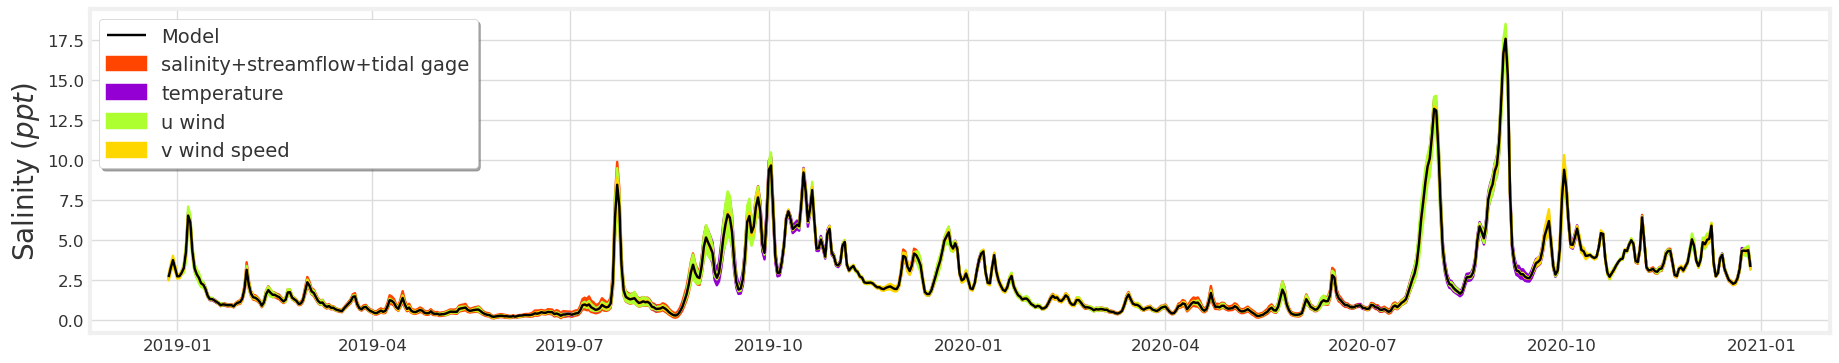

In [18]:
# testing

aux = [69,204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60]
# rate = [2.0, 1.75, 1.5, 1.25, 0.75, 0.5, 0.25, 0.0]
rate = [1.2, 0.8]

NUMP = np.zeros((test_X.shape[0], iterations))
OUTPUT_TOTAL = np.zeros((test_X.shape[0], num_variables * len(rate)))
# OUTPUT[:,:1] = m

count = 0
idx_output = 0

for j in range(len(rate)):

    idx = 0
    OUTPUT = np.zeros((test_X.shape[0], num_variables))

    for i in range(num_posterior-1):

        idx2 = aux[i] + idx
        test_X_aux = test_X.copy()
        test_X_aux[:,:,idx:idx2] = test_X[:,:,idx:idx2].copy() * rate[j]

        for n in range(iterations):
            
            ckpt = tf.train.Checkpoint(transformer=transformer)
            ckpt.restore(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/weights/ckpt_(%i)-1' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads,n))
            dist_ts, y_hat_inv_scaled, y_test_inv_scaled = TNN_test.test_informer(transformer,
                                                                              test_y_targets, 
                                                                              MC_iterations, 
                                                                              n_test, 
                                                                              test_X_aux, 
                                                                              train_y_mean, 
                                                                              train_y_std, 
                                                                              steps)

            NUMP[:,n:] = dist_ts.iloc[:,-1:]

    #     print(NUMP)

        mean, lb, ub, median, se = TNN_functions.stats(NUMP, 0.95)
        mn = pd.DataFrame(mean)
        OUTPUT[:,i:] = mn

        idx += aux[i]
#         print('idx',idx)
        count +=1
        print(count)
        
    for i in range(num_posterior-1,num_variables-1):

        idx2 = aux[i] + idx
        test_X_aux = test_X.copy()
#         print('aux', idx2)

        for k in range(steps):
            test_X_aux[:,:,idx+(aux[i]+aux[i+1]+aux[i+2]+aux[i+3]+aux[i+4])*k:idx2+(aux[i]+aux[i+1]+aux[i+2]+aux[i+3]+aux[i+4])*k] = test_X[:,:,idx+(aux[i]+aux[i+1]+aux[i+2]+aux[i+3]+aux[i+4])*k:idx2+(aux[i]+aux[i+1]+aux[i+2]+aux[i+3]+aux[i+4])*k].copy() * rate[j]

#         jk = test_X_aux[:,0,:] - test_X[:,0,:]
#         pd.DataFrame(jk).to_csv(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/jk.csv' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads))
        for n in range(iterations):
            
            ckpt = tf.train.Checkpoint(transformer=transformer)
            ckpt.restore(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/weights/ckpt_(%i)-1' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads,n))
            dist_ts, y_hat_inv_scaled, y_test_inv_scaled = TNN_test.test_informer(transformer,
                                                                              test_y_targets, 
                                                                              MC_iterations, 
                                                                              n_test, 
                                                                              test_X_aux, 
                                                                              train_y_mean, 
                                                                              train_y_std, 
                                                                              steps)

            NUMP[:,n:] = dist_ts.iloc[:,-1:]

    #     print(NUMP)

        mean, lb, ub, median, se = TNN_functions.stats(NUMP, 0.95)
        mn = pd.DataFrame(mean)
        OUTPUT[:,i:] = mn

        idx += aux[i]
#         print('idx',idx)
        count +=1
        print(count)
#         print('output:', OUTPUT)
        
    OUTPUT_TOTAL[:,idx_output:idx_output+num_variables] = OUTPUT[:,:]
    print('out:', OUTPUT_TOTAL[:,idx_output:idx_output+len(aux)])
        
    idx_output += num_variables
    
###########################################################################################################################

pd.DataFrame(OUTPUT_TOTAL)

m_broadcast = pd.DataFrame(np.repeat(m.values, num_variables * len(rate), axis=1)) 
delta_out = pd.DataFrame(OUTPUT_TOTAL).subtract(m_broadcast)
print(delta_out)

delta_out_median = pd.DataFrame(delta_out.median(axis=0))
delta_out_mean = pd.DataFrame(delta_out.mean(axis=0))

sensitivity_delta_out_mean = (delta_out_mean)
sensitivity_delta_out_median = (delta_out_median)
sensitivity_delta_out_mean.rename(columns={ sensitivity_delta_out_mean.columns[0]: "values" }, inplace = True)
sensitivity_delta_out_median.rename(columns={ sensitivity_delta_out_median.columns[0]: "values" }, inplace = True)

sensitivity_np = np.array(sensitivity_delta_out_mean)
# print(delta_out.iloc[:,40])
print(pd.DataFrame(sensitivity_np.reshape((len(rate), num_variables))).T.head(8))

###########################################################################################################################

out = pd.DataFrame(OUTPUT_TOTAL)

model = pd.DataFrame(np.concatenate([dates, m], axis=1))
model.rename(columns={model.columns[0]: "date" }, inplace = True)
model=model.set_index('date')
model.index = pd.to_datetime(model.index).date
model = pd.DataFrame(model)


alpha = 1
linewidth = 1.75
fig, ax=plt.subplots(figsize=(20, 4))
ax.set_ylabel('Salinity' +' ('+units+')', fontsize=20)

lb = out.iloc[:,0]
lb = lb.values.reshape(-1,1)
lb = pd.DataFrame(np.concatenate([dates, lb], axis=1))
lb.rename(columns={lb.columns[0]: "date" }, inplace = True)
lb=lb.set_index('date')
lb.index = pd.to_datetime(lb.index).date
lb = lb.to_numpy()
lb = lb.flatten()

ub = out.iloc[:,num_variables*(len(rate)-1)+0]
ub = ub.values.reshape(-1,1)
ub = pd.DataFrame(np.concatenate([dates, ub], axis=1))
ub.rename(columns={ub.columns[0]: "date" }, inplace = True)
ub=ub.set_index('date')
ub.index = pd.to_datetime(ub.index).date
ub = ub.to_numpy()
ub = ub.flatten()
# bounds dataframe for figure
bounds = pd.DataFrame([lb, ub]).T
#rename columns to lb and ub
columns = ("lb ub").split()
bounds.columns = columns

ax.fill_between(
        model.index,
        bounds['ub'],
        bounds['lb'],
        color = 'orangered',
        hatch='',
        edgecolor="orangered",
        linewidth = linewidth,
        alpha = 1,
        label = 'salinity+streamflow+tidal gage'
    )

lb = out.iloc[:,5]
lb = lb.values.reshape(-1,1)
lb = pd.DataFrame(np.concatenate([dates, lb], axis=1))
lb.rename(columns={lb.columns[0]: "date" }, inplace = True)
lb=lb.set_index('date')
lb.index = pd.to_datetime(lb.index).date
lb = lb.to_numpy()
lb = lb.flatten()

ub = out.iloc[:,num_variables*(len(rate)-1)+5]
ub = ub.values.reshape(-1,1)
ub = pd.DataFrame(np.concatenate([dates, ub], axis=1))
ub.rename(columns={ub.columns[0]: "date" }, inplace = True)
ub=ub.set_index('date')
ub.index = pd.to_datetime(ub.index).date
ub = ub.to_numpy()
ub = ub.flatten()
# bounds dataframe for figure
bounds = pd.DataFrame([lb, ub]).T
#rename columns to lb and ub
columns = ("lb ub").split()
bounds.columns = columns

ax.fill_between(
        model.index,
        bounds['ub'],
        bounds['lb'],
        color = 'darkviolet',
        hatch='',
        edgecolor="darkviolet",
    linestyle='-',#(0,(5,1)),
    linewidth = linewidth,
        alpha =1,
        label = 'temperature'
    )


# lb = out.iloc[:,0]
# lb = lb.values.reshape(-1,1)
# lb = pd.DataFrame(np.concatenate([dates, lb], axis=1))
# lb.rename(columns={lb.columns[0]: "date" }, inplace = True)
# lb=lb.set_index('date')
# lb.index = pd.to_datetime(lb.index).date
# lb = lb.to_numpy()
# lb = lb.flatten()

# ub = out.iloc[:,num_variables*(len(rate)-1)+0]
# ub = ub.values.reshape(-1,1)
# ub = pd.DataFrame(np.concatenate([dates, ub], axis=1))
# ub.rename(columns={ub.columns[0]: "date" }, inplace = True)
# ub=ub.set_index('date')
# ub.index = pd.to_datetime(ub.index).date
# ub = ub.to_numpy()
# ub = ub.flatten()
# # bounds dataframe for figure
# bounds = pd.DataFrame([lb, ub]).T
# #rename columns to lb and ub
# columns = ("lb ub").split()
# bounds.columns = columns

# ax.fill_between(
#         model.index,
#         bounds['ub'],
#         bounds['lb'],
#         color = 'orange',
#         hatch='',
#         edgecolor="orange",
#     linestyle='-',#(0,(5,1)),
#     linewidth = linewidth,
#         alpha =1,
#         label = 'streamflow'
#     )

lb = out.iloc[:,2]
lb = lb.values.reshape(-1,1)
lb = pd.DataFrame(np.concatenate([dates, lb], axis=1))
lb.rename(columns={lb.columns[0]: "date" }, inplace = True)
lb=lb.set_index('date')
lb.index = pd.to_datetime(lb.index).date
lb = lb.to_numpy()
lb = lb.flatten()

ub = out.iloc[:,num_variables*(len(rate)-1)+2]
ub = ub.values.reshape(-1,1)
ub = pd.DataFrame(np.concatenate([dates, ub], axis=1))
ub.rename(columns={ub.columns[0]: "date" }, inplace = True)
ub=ub.set_index('date')
ub.index = pd.to_datetime(ub.index).date
ub = ub.to_numpy()
ub = ub.flatten()
# bounds dataframe for figure
bounds = pd.DataFrame([lb, ub]).T
#rename columns to lb and ub
columns = ("lb ub").split()
bounds.columns = columns

ax.fill_between(
        model.index,
        bounds['ub'],
        bounds['lb'],
        color = 'greenyellow',
        hatch='',
        edgecolor="greenyellow",
    linestyle='-',#(0,(5,1)),
    linewidth = linewidth,
        alpha =1,
        label = 'u wind'
    )

lb = out.iloc[:,3]
lb = lb.values.reshape(-1,1)
lb = pd.DataFrame(np.concatenate([dates, lb], axis=1))
lb.rename(columns={lb.columns[0]: "date" }, inplace = True)
lb=lb.set_index('date')
lb.index = pd.to_datetime(lb.index).date
lb = lb.to_numpy()
lb = lb.flatten()

ub = out.iloc[:,num_variables*(len(rate)-1)+3]
ub = ub.values.reshape(-1,1)
ub = pd.DataFrame(np.concatenate([dates, ub], axis=1))
ub.rename(columns={ub.columns[0]: "date" }, inplace = True)
ub=ub.set_index('date')
ub.index = pd.to_datetime(ub.index).date
ub = ub.to_numpy()
ub = ub.flatten()
# bounds dataframe for figure
bounds = pd.DataFrame([lb, ub]).T
#rename columns to lb and ub
columns = ("lb ub").split()
bounds.columns = columns

ax.fill_between(
        model.index,
        bounds['ub'],
        bounds['lb'],
        color = 'gold',
        hatch='',
        edgecolor="gold",
        linewidth = linewidth,
        alpha = 1,
        label = 'v wind speed'
    )

ax.plot(model, label='Model', linestyle = '-', linewidth= linewidth, color='black')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.grid(True)
ax.legend(loc = 'upper left',fancybox=True, shadow=True, facecolor='white', fontsize=14);

1
2
3
4
5
6
out: [[2.48124108 2.68190389 2.98124506 ... 0.         0.         0.        ]
 [3.06803906 3.02181489 3.86076465 ... 0.         0.         0.        ]
 [3.55029743 3.61801672 4.29269998 ... 0.         0.         0.        ]
 ...
 [4.5634114  3.72620087 5.36090879 ... 0.         0.         0.        ]
 [4.56646833 3.79651451 5.56172919 ... 0.         0.         0.        ]
 [3.464516   3.24883778 3.92536275 ... 0.         0.         0.        ]]
7
8
9
10
11
12
out: [[2.84194295 2.7289005  3.00248024 ... 2.27984283 2.91704998 2.91704998]
 [3.40289252 4.03920336 3.03083701 ... 2.95890889 3.77748959 3.77748959]
 [3.88927455 4.64744592 3.36508729 ... 3.27932627 4.37085745 4.37085745]
 ...
 [3.98885074 4.92801423 3.07484145 ... 4.22376182 4.96386304 4.96386304]
 [4.08690872 4.76178997 3.05218997 ... 4.23082747 5.28621442 5.28621442]
 [3.11815877 3.31439829 2.75302618 ... 3.38063352 4.00763929 4.00763929]]
           0         1         2         3         4         5         6   

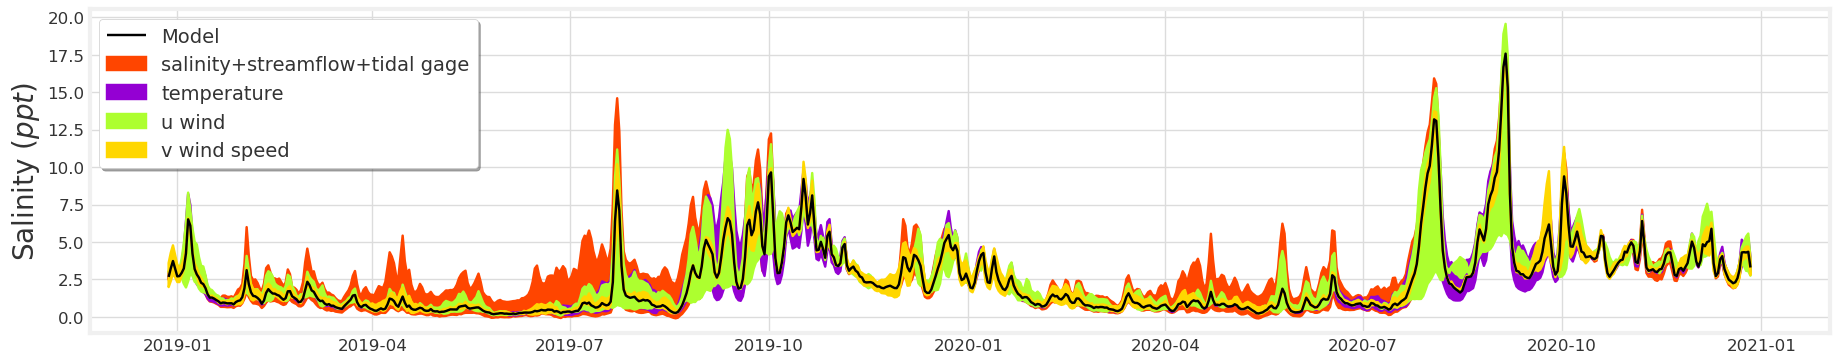

In [19]:
# testing

aux = [69,204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60,
             204,103,103,60,60]
# rate = [2.0, 1.75, 1.5, 1.25, 0.75, 0.5, 0.25, 0.0]
rate = [2, 0]

NUMP = np.zeros((test_X.shape[0], iterations))
OUTPUT_TOTAL = np.zeros((test_X.shape[0], num_variables * len(rate)))
# OUTPUT[:,:1] = m

count = 0
idx_output = 0

for j in range(len(rate)):

    idx = 0
    OUTPUT = np.zeros((test_X.shape[0], num_variables))

    for i in range(num_posterior-1):

        idx2 = aux[i] + idx
        test_X_aux = test_X.copy()
        test_X_aux[:,:,idx:idx2] = test_X[:,:,idx:idx2].copy() * rate[j]

        for n in range(iterations):
            
            ckpt = tf.train.Checkpoint(transformer=transformer)
            ckpt.restore(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/weights/ckpt_(%i)-1' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads,n))
            dist_ts, y_hat_inv_scaled, y_test_inv_scaled = TNN_test.test_informer(transformer,
                                                                              test_y_targets, 
                                                                              MC_iterations, 
                                                                              n_test, 
                                                                              test_X_aux, 
                                                                              train_y_mean, 
                                                                              train_y_std, 
                                                                              steps)

            NUMP[:,n:] = dist_ts.iloc[:,-1:]

    #     print(NUMP)

        mean, lb, ub, median, se = TNN_functions.stats(NUMP, 0.95)
        mn = pd.DataFrame(mean)
        OUTPUT[:,i:] = mn

        idx += aux[i]
#         print('idx',idx)
        count +=1
        print(count)
        
    for i in range(num_posterior-1,num_variables-1):

        idx2 = aux[i] + idx
        test_X_aux = test_X.copy()
#         print('aux', idx2)

        for k in range(steps):
            test_X_aux[:,:,idx+(aux[i]+aux[i+1]+aux[i+2]+aux[i+3]+aux[i+4])*k:idx2+(aux[i]+aux[i+1]+aux[i+2]+aux[i+3]+aux[i+4])*k] = test_X[:,:,idx+(aux[i]+aux[i+1]+aux[i+2]+aux[i+3]+aux[i+4])*k:idx2+(aux[i]+aux[i+1]+aux[i+2]+aux[i+3]+aux[i+4])*k].copy() * rate[j]

#         jk = test_X_aux[:,0,:] - test_X[:,0,:]
#         pd.DataFrame(jk).to_csv(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/jk.csv' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads))
        for n in range(iterations):
            
            ckpt = tf.train.Checkpoint(transformer=transformer)
            ckpt.restore(path_to_the_directory+variable+'_'+station+'_%isteps_%ilag_95PPU_%iemb_%ibatch_%idff_%ilayers_%iheads/weights/ckpt_(%i)-1' %(steps, t_lag, emb_dim_enc, batch_size, dff, num_layers, num_heads,n))
            dist_ts, y_hat_inv_scaled, y_test_inv_scaled = TNN_test.test_informer(transformer,
                                                                              test_y_targets, 
                                                                              MC_iterations, 
                                                                              n_test, 
                                                                              test_X_aux, 
                                                                              train_y_mean, 
                                                                              train_y_std, 
                                                                              steps)

            NUMP[:,n:] = dist_ts.iloc[:,-1:]

    #     print(NUMP)

        mean, lb, ub, median, se = TNN_functions.stats(NUMP, 0.95)
        mn = pd.DataFrame(mean)
        OUTPUT[:,i:] = mn

        idx += aux[i]
#         print('idx',idx)
        count +=1
        print(count)
#         print('output:', OUTPUT)
        
    OUTPUT_TOTAL[:,idx_output:idx_output+num_variables] = OUTPUT[:,:]
    print('out:', OUTPUT_TOTAL[:,idx_output:idx_output+len(aux)])
        
    idx_output += num_variables
    
###########################################################################################################################

pd.DataFrame(OUTPUT_TOTAL)

m_broadcast = pd.DataFrame(np.repeat(m.values, num_variables * len(rate), axis=1)) 
delta_out = pd.DataFrame(OUTPUT_TOTAL).subtract(m_broadcast)
print(delta_out)

delta_out_median = pd.DataFrame(delta_out.median(axis=0))
delta_out_mean = pd.DataFrame(delta_out.mean(axis=0))

sensitivity_delta_out_mean = (delta_out_mean)
sensitivity_delta_out_median = (delta_out_median)
sensitivity_delta_out_mean.rename(columns={ sensitivity_delta_out_mean.columns[0]: "values" }, inplace = True)
sensitivity_delta_out_median.rename(columns={ sensitivity_delta_out_median.columns[0]: "values" }, inplace = True)

sensitivity_np = np.array(sensitivity_delta_out_mean)
# print(delta_out.iloc[:,40])
print(pd.DataFrame(sensitivity_np.reshape((len(rate), num_variables))).T.head(8))

###########################################################################################################################

out = pd.DataFrame(OUTPUT_TOTAL)

model = pd.DataFrame(np.concatenate([dates, m], axis=1))
model.rename(columns={model.columns[0]: "date" }, inplace = True)
model=model.set_index('date')
model.index = pd.to_datetime(model.index).date
model = pd.DataFrame(model)


alpha = 1
linewidth = 1.75
fig, ax=plt.subplots(figsize=(20, 4))
ax.set_ylabel('Salinity' +' ('+units+')', fontsize=20)

lb = out.iloc[:,0]
lb = lb.values.reshape(-1,1)
lb = pd.DataFrame(np.concatenate([dates, lb], axis=1))
lb.rename(columns={lb.columns[0]: "date" }, inplace = True)
lb=lb.set_index('date')
lb.index = pd.to_datetime(lb.index).date
lb = lb.to_numpy()
lb = lb.flatten()

ub = out.iloc[:,num_variables*(len(rate)-1)+0]
ub = ub.values.reshape(-1,1)
ub = pd.DataFrame(np.concatenate([dates, ub], axis=1))
ub.rename(columns={ub.columns[0]: "date" }, inplace = True)
ub=ub.set_index('date')
ub.index = pd.to_datetime(ub.index).date
ub = ub.to_numpy()
ub = ub.flatten()
# bounds dataframe for figure
bounds = pd.DataFrame([lb, ub]).T
#rename columns to lb and ub
columns = ("lb ub").split()
bounds.columns = columns

ax.fill_between(
        model.index,
        bounds['ub'],
        bounds['lb'],
        color = 'orangered',
        hatch='',
        edgecolor="orangered",
        linewidth = linewidth,
        alpha = 1,
        label = 'salinity+streamflow+tidal gage'
    )

lb = out.iloc[:,5]
lb = lb.values.reshape(-1,1)
lb = pd.DataFrame(np.concatenate([dates, lb], axis=1))
lb.rename(columns={lb.columns[0]: "date" }, inplace = True)
lb=lb.set_index('date')
lb.index = pd.to_datetime(lb.index).date
lb = lb.to_numpy()
lb = lb.flatten()

ub = out.iloc[:,num_variables*(len(rate)-1)+5]
ub = ub.values.reshape(-1,1)
ub = pd.DataFrame(np.concatenate([dates, ub], axis=1))
ub.rename(columns={ub.columns[0]: "date" }, inplace = True)
ub=ub.set_index('date')
ub.index = pd.to_datetime(ub.index).date
ub = ub.to_numpy()
ub = ub.flatten()
# bounds dataframe for figure
bounds = pd.DataFrame([lb, ub]).T
#rename columns to lb and ub
columns = ("lb ub").split()
bounds.columns = columns

ax.fill_between(
        model.index,
        bounds['ub'],
        bounds['lb'],
        color = 'darkviolet',
        hatch='',
        edgecolor="darkviolet",
    linestyle='-',#(0,(5,1)),
    linewidth = linewidth,
        alpha =1,
        label = 'temperature'
    )


# lb = out.iloc[:,0]
# lb = lb.values.reshape(-1,1)
# lb = pd.DataFrame(np.concatenate([dates, lb], axis=1))
# lb.rename(columns={lb.columns[0]: "date" }, inplace = True)
# lb=lb.set_index('date')
# lb.index = pd.to_datetime(lb.index).date
# lb = lb.to_numpy()
# lb = lb.flatten()

# ub = out.iloc[:,num_variables*(len(rate)-1)+0]
# ub = ub.values.reshape(-1,1)
# ub = pd.DataFrame(np.concatenate([dates, ub], axis=1))
# ub.rename(columns={ub.columns[0]: "date" }, inplace = True)
# ub=ub.set_index('date')
# ub.index = pd.to_datetime(ub.index).date
# ub = ub.to_numpy()
# ub = ub.flatten()
# # bounds dataframe for figure
# bounds = pd.DataFrame([lb, ub]).T
# #rename columns to lb and ub
# columns = ("lb ub").split()
# bounds.columns = columns

# ax.fill_between(
#         model.index,
#         bounds['ub'],
#         bounds['lb'],
#         color = 'orange',
#         hatch='',
#         edgecolor="orange",
#     linestyle='-',#(0,(5,1)),
#     linewidth = linewidth,
#         alpha =1,
#         label = 'streamflow'
#     )

lb = out.iloc[:,2]
lb = lb.values.reshape(-1,1)
lb = pd.DataFrame(np.concatenate([dates, lb], axis=1))
lb.rename(columns={lb.columns[0]: "date" }, inplace = True)
lb=lb.set_index('date')
lb.index = pd.to_datetime(lb.index).date
lb = lb.to_numpy()
lb = lb.flatten()

ub = out.iloc[:,num_variables*(len(rate)-1)+2]
ub = ub.values.reshape(-1,1)
ub = pd.DataFrame(np.concatenate([dates, ub], axis=1))
ub.rename(columns={ub.columns[0]: "date" }, inplace = True)
ub=ub.set_index('date')
ub.index = pd.to_datetime(ub.index).date
ub = ub.to_numpy()
ub = ub.flatten()
# bounds dataframe for figure
bounds = pd.DataFrame([lb, ub]).T
#rename columns to lb and ub
columns = ("lb ub").split()
bounds.columns = columns

ax.fill_between(
        model.index,
        bounds['ub'],
        bounds['lb'],
        color = 'greenyellow',
        hatch='',
        edgecolor="greenyellow",
    linestyle='-',#(0,(5,1)),
    linewidth = linewidth,
        alpha =1,
        label = 'u wind'
    )

lb = out.iloc[:,3]
lb = lb.values.reshape(-1,1)
lb = pd.DataFrame(np.concatenate([dates, lb], axis=1))
lb.rename(columns={lb.columns[0]: "date" }, inplace = True)
lb=lb.set_index('date')
lb.index = pd.to_datetime(lb.index).date
lb = lb.to_numpy()
lb = lb.flatten()

ub = out.iloc[:,num_variables*(len(rate)-1)+3]
ub = ub.values.reshape(-1,1)
ub = pd.DataFrame(np.concatenate([dates, ub], axis=1))
ub.rename(columns={ub.columns[0]: "date" }, inplace = True)
ub=ub.set_index('date')
ub.index = pd.to_datetime(ub.index).date
ub = ub.to_numpy()
ub = ub.flatten()
# bounds dataframe for figure
bounds = pd.DataFrame([lb, ub]).T
#rename columns to lb and ub
columns = ("lb ub").split()
bounds.columns = columns

ax.fill_between(
        model.index,
        bounds['ub'],
        bounds['lb'],
        color = 'gold',
        hatch='',
        edgecolor="gold",
        linewidth = linewidth,
        alpha = 1,
        label = 'v wind speed'
    )

ax.plot(model, label='Model', linestyle = '-', linewidth= linewidth, color='black')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.grid(True)
ax.legend(loc = 'upper left',fancybox=True, shadow=True, facecolor='white', fontsize=14);

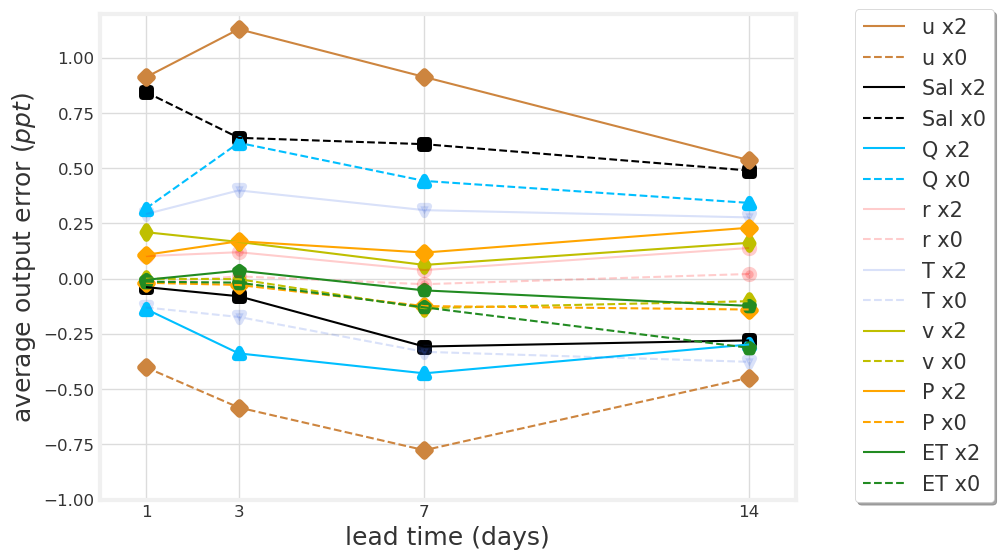

In [20]:
S2 = [-0.038205, -0.079541, -0.307183, -0.279454] 
S0 = [0.844466 , 0.637658, 0.608854  , 0.489498 ]
Q2 = [-0.137406, -0.338210, -0.428464,-0.297787]
Q0= [0.317647, 0.615030, 0.442547, 0.343022]
r2 = [0.101978, 0.119858, 0.039030, 0.138895]
r0 = [-0.020289,  0.010466, -0.024999, 0.021272]
u2 = [0.911889, 1.129428, 0.913038,  0.5361495]
u0 = [-0.401476, -0.583224, -0.776410, -0.448048]
v2 = [0.210393, 0.166315, 0.062278, 0.162298]
v0 = [-0.000311, -0.002169, -0.133408, -0.102021]
P2 = [0.108021,0.169445 , 0.118084, 0.230647]
P0 = [-0.018494, -0.028386, -0.124123, -0.139620]
ET2 = [-0.005085,  0.036278, -0.052997, -0.123171]
ET0 = [-0.013508, -0.017908 , -0.129863,-0.312986]
T2 = [0.292468,  0.399586 , 0.310177, 0.277309]
T0 =[-0.130458, -0.173291, -0.331145 , -0.376473]

alpha = [1,1,0.2,1,1,0.2,1,1,0.2]

linewidth = 5
linewidth_r = 5
color_empty = 'black'
color_empty_r = 'red'
color_empty_u = 'peru'
color_empty_v = 'y'
color_empty_T = 'royalblue'
color_empty_Q= 'deepskyblue'
color_empty_P = 'orange'
color_empty_ET = 'forestgreen'

y=[1,3,7,14]

fig, ax=plt.subplots(figsize=(8, 6))
# use axis={'both', 'x', 'y'} to choose axis
ax = plt.gca()
ax.plot(y, u2, color='peru', label='u x2', alpha=alpha[3])
ax.plot(y, u0, color='peru', label='u x0', alpha=alpha[3], linestyle='dashed')

ax.plot(y, S2, color='black', label='Sal x2', alpha=alpha[0])
ax.plot(y, S0, color='black', label='Sal x0', alpha=alpha[0], linestyle='dashed')

ax.plot(y, Q2, color='deepskyblue', label='Q x2', alpha=alpha[1])
ax.plot(y, Q0, color='deepskyblue', label='Q x0', alpha=alpha[1],  linestyle='dashed')

ax.plot(y, r2, color='red', label='r x2', alpha=alpha[2])
ax.plot(y, r0, color='red', label='r x0', alpha=alpha[2],  linestyle='dashed')

ax.plot(y, T2, color='royalblue', label='T x2', alpha=alpha[5])
ax.plot(y, T0, color='royalblue', label='T x0', alpha=alpha[5] , linestyle='dashed')



ax.plot(y, v2, color='y', label='v x2', alpha=alpha[4])
ax.plot(y, v0, color='y', label='v x0', alpha=alpha[4], linestyle='dashed')



ax.plot(y, P2, color='orange', label='P x2', alpha=alpha[6])
ax.plot(y, P0, color='orange', label='P x0', alpha=alpha[6],  linestyle='dashed')

ax.plot(y, ET2, color='forestgreen', label='ET x2', alpha=alpha[7])
ax.plot(y, ET0, color='forestgreen', label='ET x0', alpha=alpha[7],  linestyle='dashed')


ax.scatter(1, np.array(S2[0]),  marker='s', color='black', linewidth = linewidth, alpha = alpha[0], edgecolor='black')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(1, np.array(S0[0]),  marker='s', color=color_empty, linewidth = linewidth, alpha = alpha[0], edgecolor='black')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana)
ax.scatter(3, np.array(S2[1]),  marker='s', color='black', linewidth = linewidth, alpha = alpha[0], edgecolor='black')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(3, np.array(S0[1]),  marker='s', color=color_empty, linewidth = linewidth, alpha = alpha[0], edgecolor='black')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(7, np.array(S2[2]),  marker='s', color='black', linewidth = linewidth, alpha = alpha[0], edgecolor='black')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(7, np.array(S0[2]),  marker='s', color=color_empty, linewidth = linewidth, alpha = alpha[0], edgecolor='black')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(14, np.array(S2[3]),  marker='s', color='black', linewidth = linewidth, alpha = alpha[0], edgecolor='black')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(14, np.array(S0[3]),  marker='s', color=color_empty, linewidth = linewidth, alpha = alpha[0], edgecolor='black')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 

ax.scatter(1, np.array(r2[0]),  marker='o', color='red', linewidth = linewidth, alpha =alpha[2], edgecolor='red')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(1, np.array(r0[0]), marker='o', color=color_empty_r, linewidth = linewidth, alpha = alpha[2], edgecolor='red')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana)
ax.scatter(3, np.array(r2[1]),  marker='o', color='red', linewidth = linewidth, alpha = alpha[2], edgecolor='red')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(3, np.array(r0[1]),  marker='o', color=color_empty_r, linewidth = linewidth, alpha = alpha[2], edgecolor='red')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(7, np.array(r2[2]),  marker='o', color='red', linewidth = linewidth, alpha = alpha[2], edgecolor='red')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(7, np.array(r0[2]),  marker='o', color=color_empty_r, linewidth = linewidth, alpha = alpha[2], edgecolor='red')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(14, np.array(r2[3]),  marker='o', color='red', linewidth = linewidth, alpha = alpha[2], edgecolor='red')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(14, np.array(r0[3]),  marker='o', color=color_empty_r, linewidth = linewidth, alpha = alpha[2], edgecolor='red')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 

ax.scatter(1, np.array(T2[0]),  marker='v', color='royalblue', linewidth = linewidth, alpha = alpha[5], edgecolor='royalblue')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(1, np.array(T0[0]),  marker='v', color=color_empty_T, linewidth = linewidth, alpha = alpha[5], edgecolor='royalblue')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana)
ax.scatter(3, np.array(T2[1]),  marker='v', color='royalblue', linewidth = linewidth, alpha = alpha[5], edgecolor='royalblue')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(3, np.array(T0[1]),  marker='v', color=color_empty_T, linewidth = linewidth, alpha = alpha[5], edgecolor='royalblue')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(7, np.array(T2[2]),  marker='v', color='royalblue', linewidth = linewidth, alpha = alpha[5], edgecolor='royalblue')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(7, np.array(T0[2]),  marker='v', color=color_empty_T, linewidth = linewidth, alpha = alpha[5], edgecolor='royalblue')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(14, np.array(T2[3]),  marker='v', color='royalblue', linewidth = linewidth, alpha = alpha[5], edgecolor='royalblue')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(14, np.array(T0[3]),  marker='v', color=color_empty_T, linewidth = linewidth, alpha = alpha[5], edgecolor='royalblue')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 

ax.scatter(1, np.array(u2[0]), marker='D', color='peru', linewidth = linewidth, alpha = alpha[3], edgecolor='peru')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(1, np.array(u0[0]),  marker='D', color=color_empty_u, linewidth = linewidth, alpha = alpha[3], edgecolor='peru')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana)
ax.scatter(3, np.array(u2[1]),  marker='D', color='peru', linewidth = linewidth, alpha = alpha[3], edgecolor='peru')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(3, np.array(u0[1]),  marker='D', color=color_empty_u, linewidth = linewidth, alpha =alpha[3], edgecolor='peru')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(7, np.array(u2[2]),  marker='D', color='peru', linewidth = linewidth, alpha = alpha[3], edgecolor='peru')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(7, np.array(u0[2]),  marker='D', color=color_empty_u, linewidth = linewidth, alpha = alpha[3], edgecolor='peru')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(14, np.array(u2[3]),  marker='D', color='peru', linewidth = linewidth, alpha = alpha[3], edgecolor='peru')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(14, np.array(u0[3]),  marker='D', color=color_empty_u, linewidth = linewidth, alpha = alpha[3], edgecolor='peru')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 

ax.scatter(1, np.array(v2[0]),  marker='d', color='y', linewidth = linewidth, alpha = alpha[4], edgecolor='y')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(1, np.array(v0[0]),  marker='d', color=color_empty_v, linewidth = linewidth, alpha = alpha[4], edgecolor='y')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana)
ax.scatter(3, np.array(v2[1]),  marker='d', color='y', linewidth = linewidth, alpha = alpha[4], edgecolor='y')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(3, np.array(v0[1]),  marker='d', color=color_empty_v, linewidth = linewidth, alpha = alpha[4], edgecolor='y')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(7, np.array(v2[2]),  marker='d', color='y', linewidth = linewidth, alpha = alpha[4], edgecolor='y')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(7, np.array(v0[2]),  marker='d', color=color_empty_v, linewidth = linewidth, alpha =alpha[4], edgecolor='y')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(14, np.array(v2[3]),  marker='d', color='y', linewidth = linewidth, alpha = alpha[4], edgecolor='y')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(14, np.array(v0[3]),  marker='d', color=color_empty_v, linewidth = linewidth, alpha = alpha[4], edgecolor='y')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 


ax.scatter(1, np.array(Q2[0]),  marker='^', color='deepskyblue', linewidth = linewidth, alpha = alpha[1], edgecolor='deepskyblue')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(1, np.array(Q0[0]),  marker='^', color=color_empty_Q, linewidth = linewidth, alpha = alpha[1], edgecolor='deepskyblue')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana)
ax.scatter(3, np.array(Q2[1]),  marker='^', color='deepskyblue', linewidth = linewidth, alpha = alpha[1], edgecolor='deepskyblue')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(3, np.array(Q0[1]),  marker='^', color=color_empty_Q, linewidth = linewidth, alpha = alpha[1], edgecolor='deepskyblue')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(7, np.array(Q2[2]),  marker='^', color='deepskyblue', linewidth = linewidth, alpha = alpha[1], edgecolor='deepskyblue')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(7, np.array(Q0[2]),  marker='^', color=color_empty_Q, linewidth = linewidth, alpha = alpha[1], edgecolor='deepskyblue')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(14, np.array(Q2[3]),  marker='^', color='deepskyblue', linewidth = linewidth, alpha = alpha[1], edgecolor='deepskyblue')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(14, np.array(Q0[3]),  marker='^', color=color_empty_Q, linewidth = linewidth, alpha = alpha[1], edgecolor='deepskyblue')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 

ax.scatter(1, np.array(P2[0]),  marker='D', color='orange', linewidth = linewidth, alpha = alpha[6], edgecolor='orange')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(1, np.array(P0[0]),  marker='D', color=color_empty_P, linewidth = linewidth, alpha = alpha[6], edgecolor='orange')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana)
ax.scatter(3, np.array(P2[1]),  marker='D', color='orange', linewidth = linewidth, alpha = alpha[6], edgecolor='orange')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(3, np.array(P0[1]),  marker='D', color=color_empty_P, linewidth = linewidth, alpha = alpha[6], edgecolor='orange')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(7, np.array(P2[2]),  marker='D', color='orange', linewidth = linewidth, alpha = alpha[6], edgecolor='orange')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(7, np.array(P0[2]),  marker='D', color=color_empty_P, linewidth = linewidth, alpha = alpha[6], edgecolor='orange')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(14, np.array(P2[3]),  marker='D', color='orange', linewidth = linewidth, alpha = alpha[6], edgecolor='orange')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(14, np.array(P0[3]),  marker='D', color=color_empty_P, linewidth = linewidth, alpha = alpha[6], edgecolor='orange')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 

ax.scatter(1, np.array(ET2[0]),  marker='p', color='forestgreen', linewidth = linewidth, alpha = alpha[7],edgecolor='forestgreen')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(1, np.array(ET0[0]),  marker='p', color=color_empty_ET, linewidth = linewidth, alpha = alpha[7], edgecolor='forestgreen')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana)
ax.scatter(3, np.array(ET2[1]),  marker='p', color='forestgreen', linewidth = linewidth, alpha = alpha[7], edgecolor='forestgreen')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(3, np.array(ET0[1]),  marker='p', color=color_empty_ET, linewidth = linewidth, alpha = alpha[7], edgecolor='forestgreen')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(7, np.array(ET2[2]),  marker='p', color='forestgreen', linewidth = linewidth, alpha = alpha[7], edgecolor='forestgreen')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(7, np.array(ET0[2]),  marker='p', color=color_empty_ET, linewidth = linewidth, alpha = alpha[7], edgecolor='forestgreen')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(14, np.array(ET2[3]),  marker='p', color='forestgreen', linewidth = linewidth, alpha = alpha[7], edgecolor='forestgreen')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 
ax.scatter(14, np.array(ET0[3]),  marker='p', color=color_empty_ET, linewidth = linewidth, alpha = alpha[7], edgecolor='forestgreen')#color="#23b7ff") 	#FFB90F (darkgolden); #E3CF57 (banana) 




ax.set_ylabel('average output error' +' ('+units+')', fontsize=18)
ax.set_xlabel('lead time (days)', fontsize=18)

ax.set_ylim([-1, 1.2])
ax.set_xlim([0, 15])

plt.xticks([1,3,7,14])
ax.legend(fancybox=True, shadow=True, facecolor='white', fontsize=15, bbox_to_anchor=(0.8, 0.53, 0.5, 0.5));
